<a href="https://colab.research.google.com/github/nilakshi104/Staircase-Segmentation/blob/master/stairpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [ ]:
dataroot="/content/drive/My Drive/Projects/Results_StairPose/mask"

In [ ]:
def hough_transform(image):
    """
    Determine and cut the region of interest in the input image.
        Parameters:
            image: The output of a Canny transform.
    """
    rho = 1            #Distance resolution of the accumulator in pixels.
    theta = np.pi/180    #Angle resolution of the accumulator in radians.
    threshold = 87      #Only lines that are greater than threshold will be returned.
    minLineLength = 10   #Line segments shorter than that are rejected.
    maxLineGap = 350     #Maximum allowed gap between points on the same line to link them
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)

Parameters Corner Harris:

    src – Input single-channel 8-bit or floating-point image.

    dst – Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .

    blockSize – Neighborhood size (see the details on cornerEigenValsAndVecs() .

    ksize – Aperture parameter for the Sobel() operator.

    k – Harris detector free parameter. See the formula below.
    
    borderType – Pixel extrapolation method. See borderInterpolate() .

/content/drive/My Drive/Projects/Results_StairPose/mask/1476.png


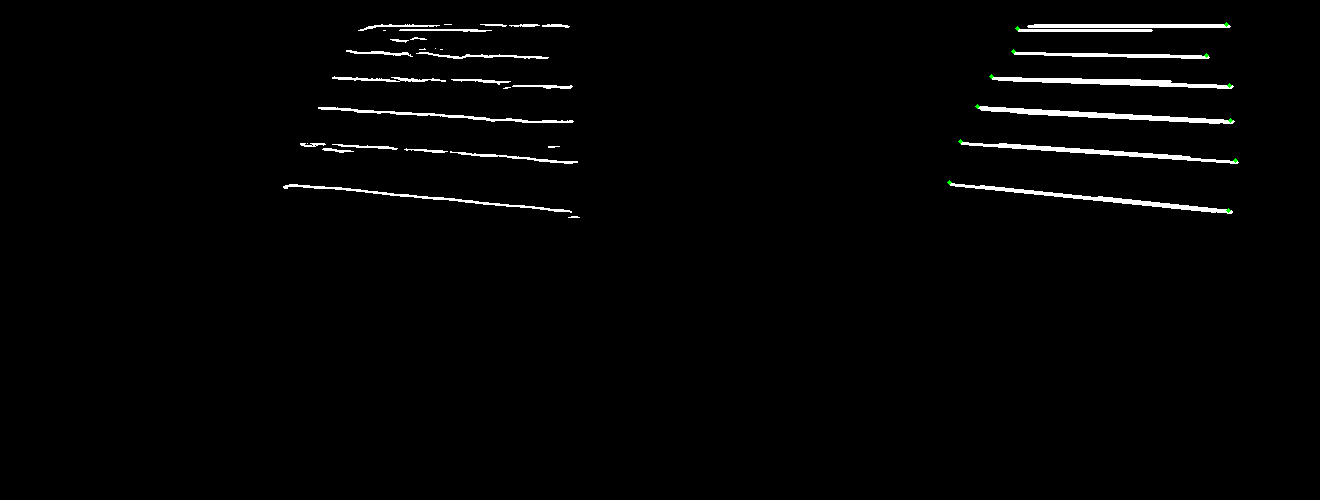

/content/drive/My Drive/Projects/Results_StairPose/mask/1477.png


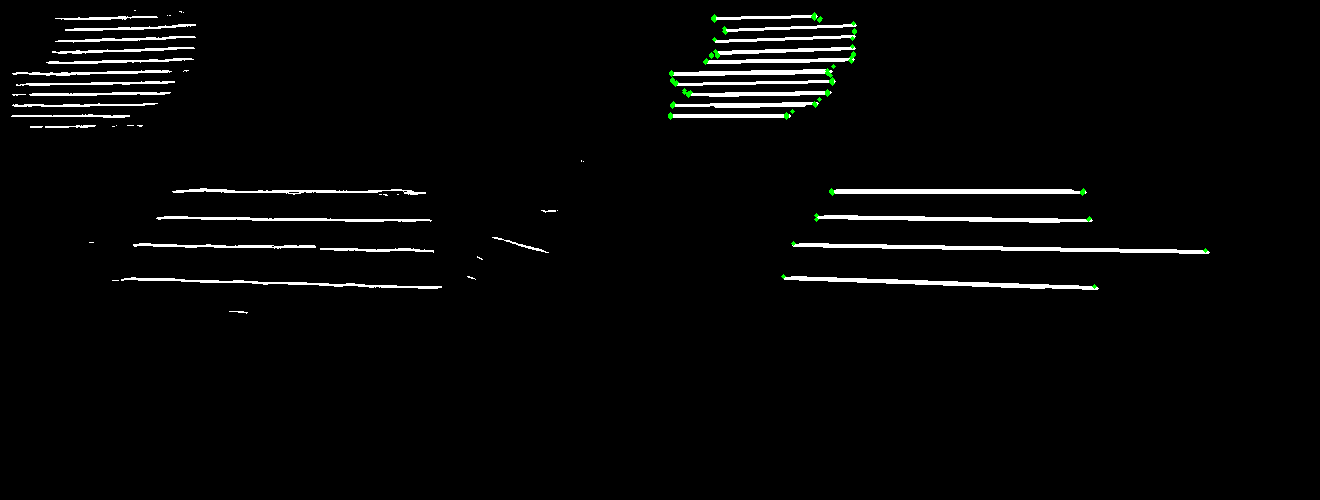

/content/drive/My Drive/Projects/Results_StairPose/mask/1478.png


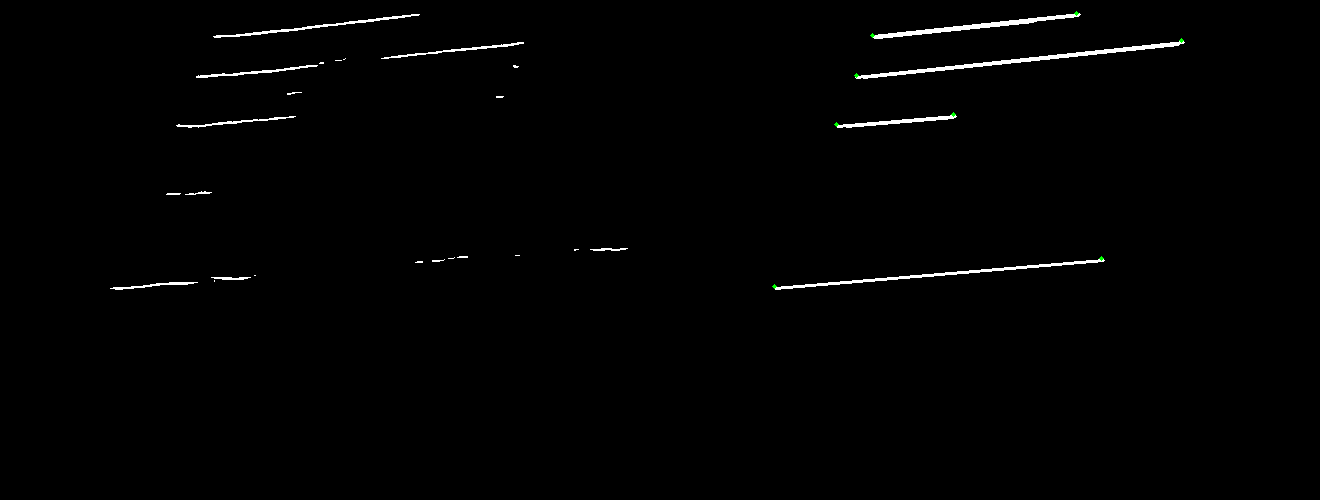

/content/drive/My Drive/Projects/Results_StairPose/mask/1479.png


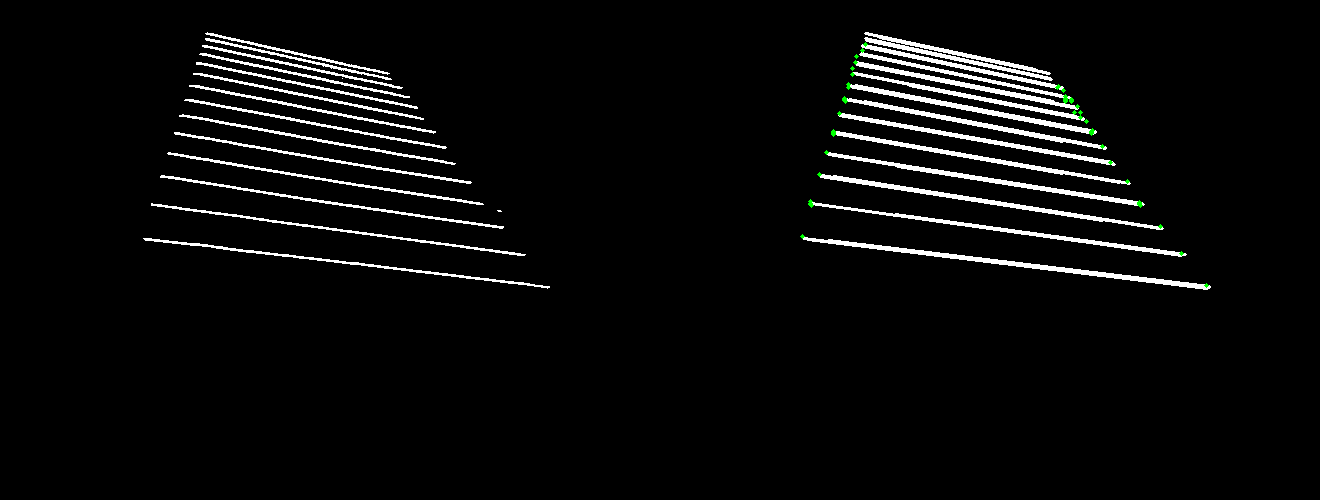

/content/drive/My Drive/Projects/Results_StairPose/mask/1481.png


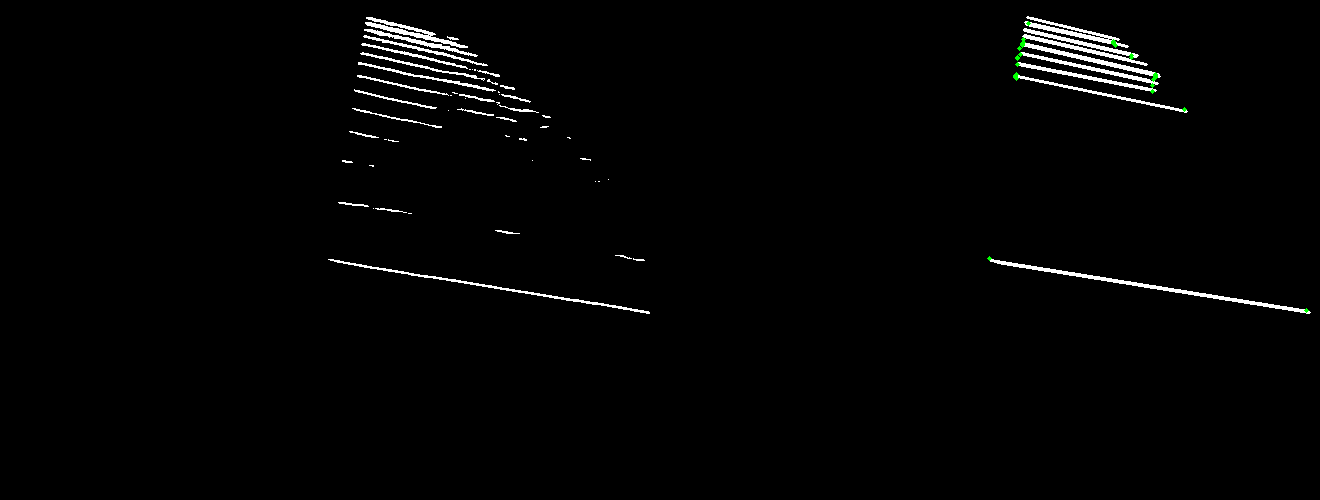

/content/drive/My Drive/Projects/Results_StairPose/mask/1482.png


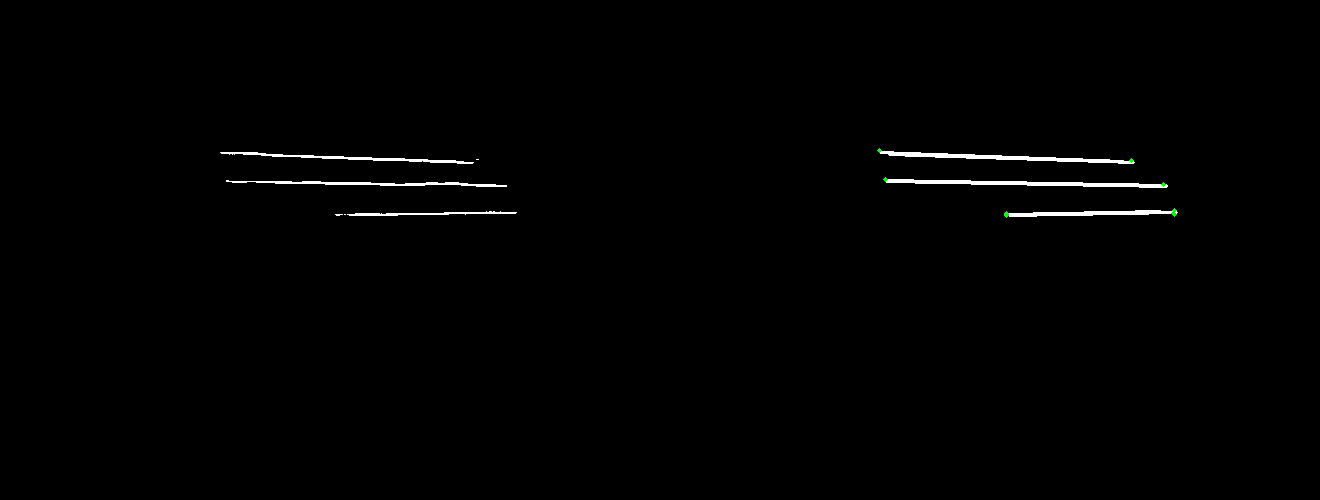

/content/drive/My Drive/Projects/Results_StairPose/mask/1483.png


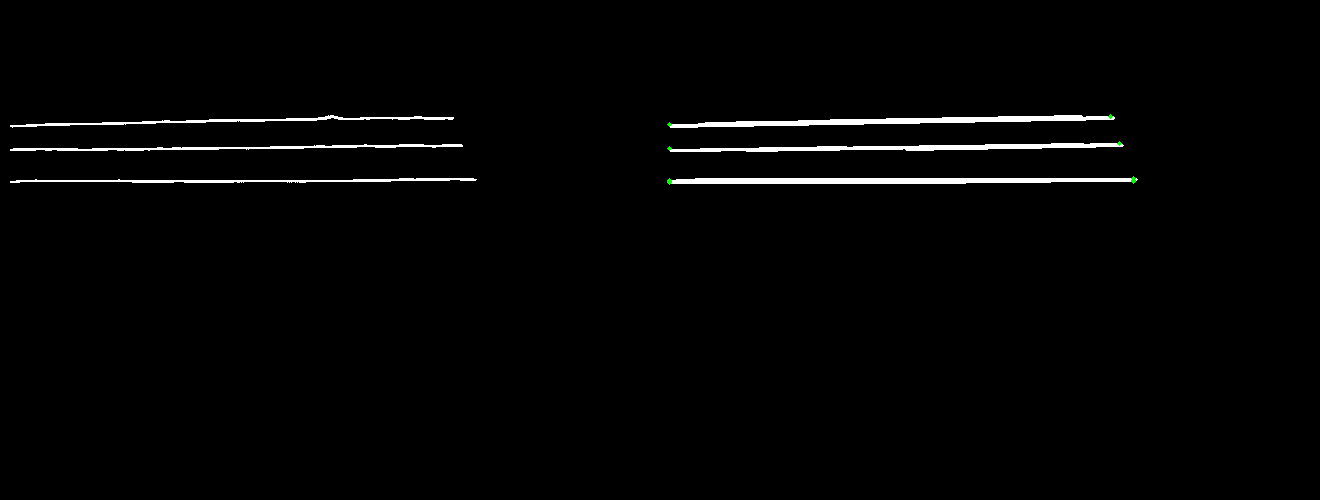

/content/drive/My Drive/Projects/Results_StairPose/mask/1484.png


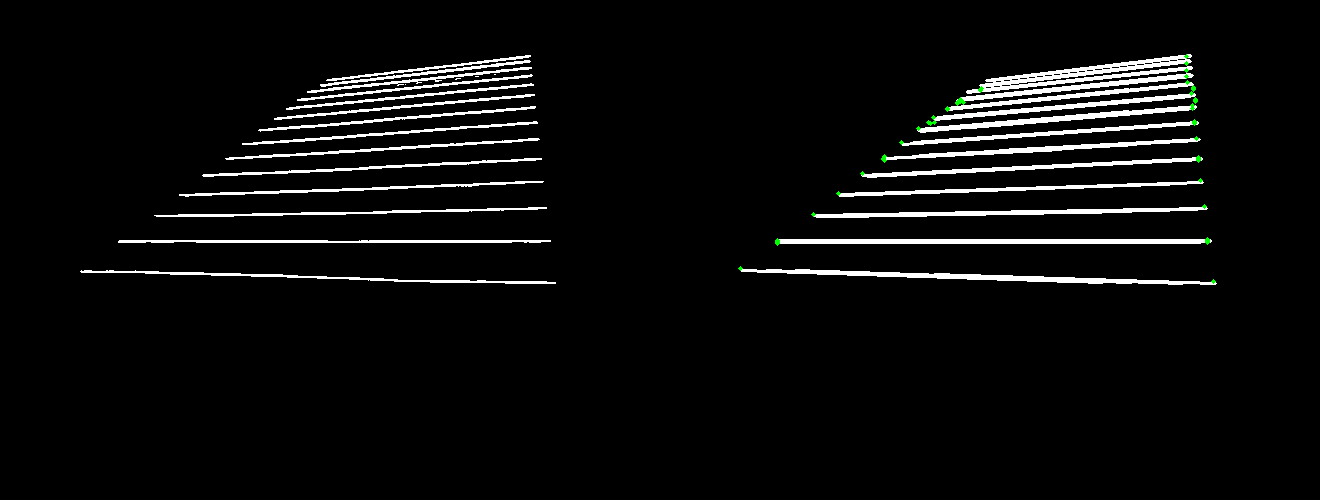

/content/drive/My Drive/Projects/Results_StairPose/mask/1485.png


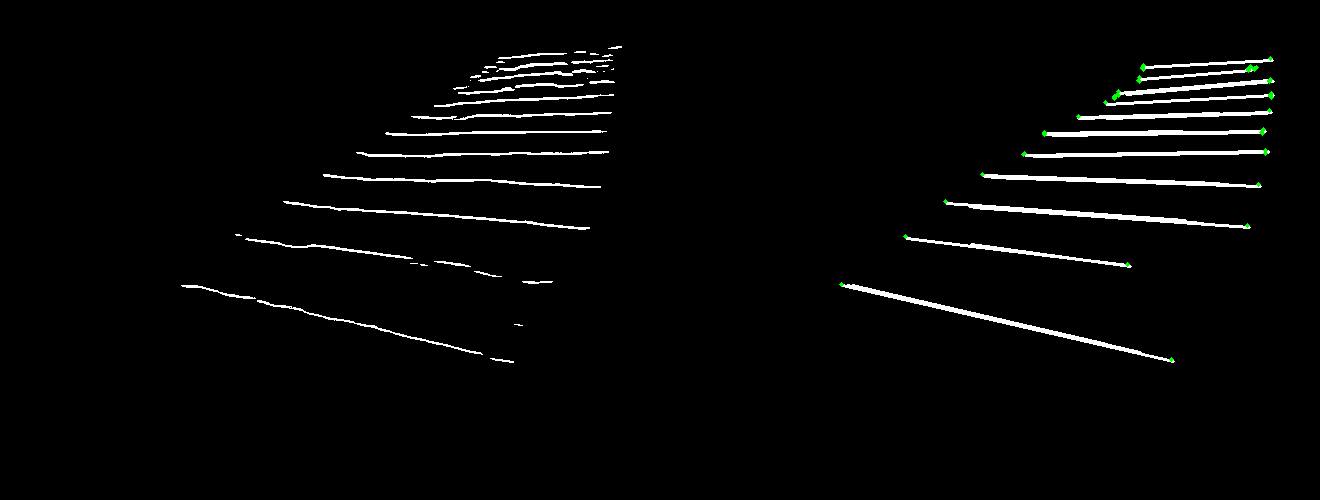

/content/drive/My Drive/Projects/Results_StairPose/mask/1486.png


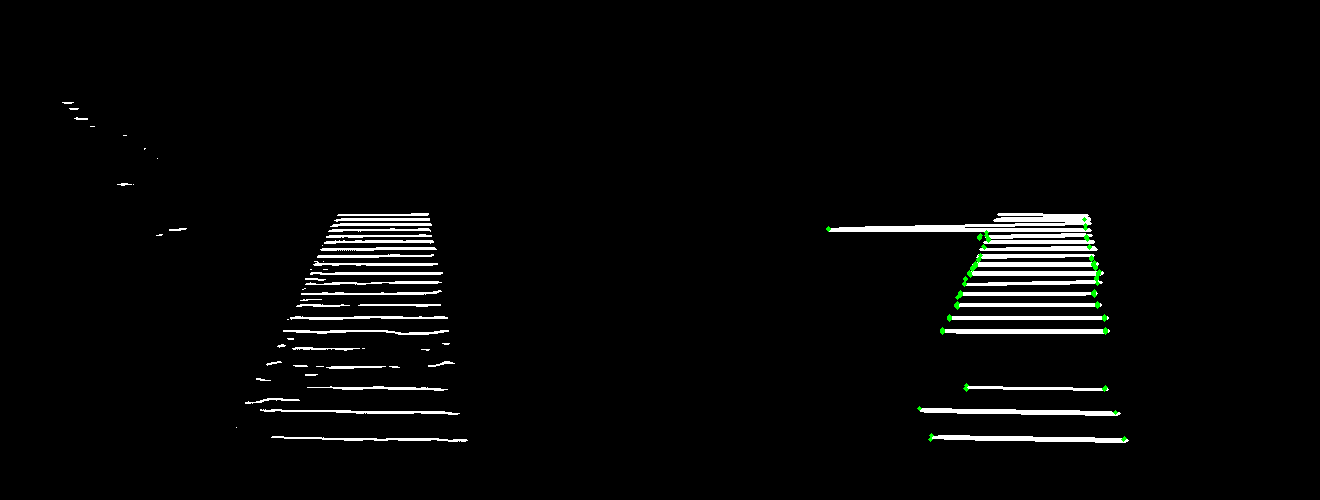

/content/drive/My Drive/Projects/Results_StairPose/mask/1487.png


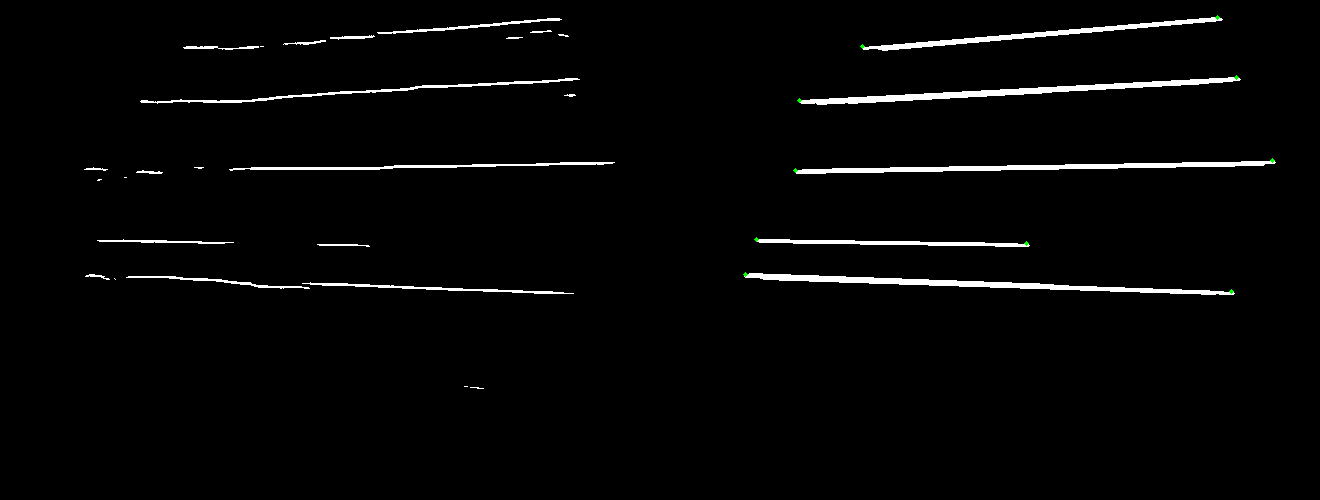

/content/drive/My Drive/Projects/Results_StairPose/mask/1488.png


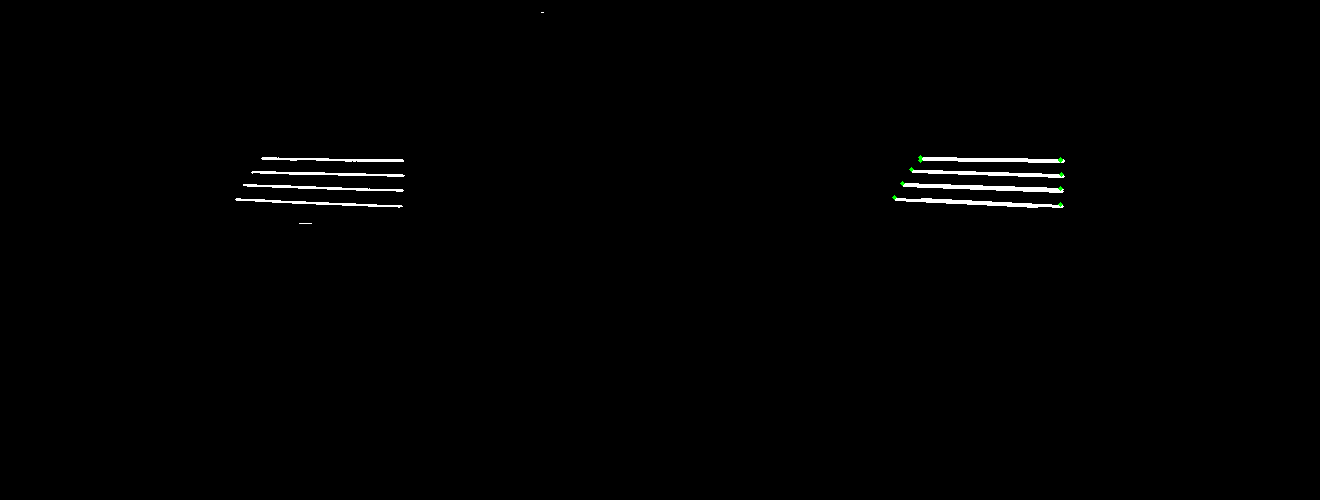

/content/drive/My Drive/Projects/Results_StairPose/mask/1489.png


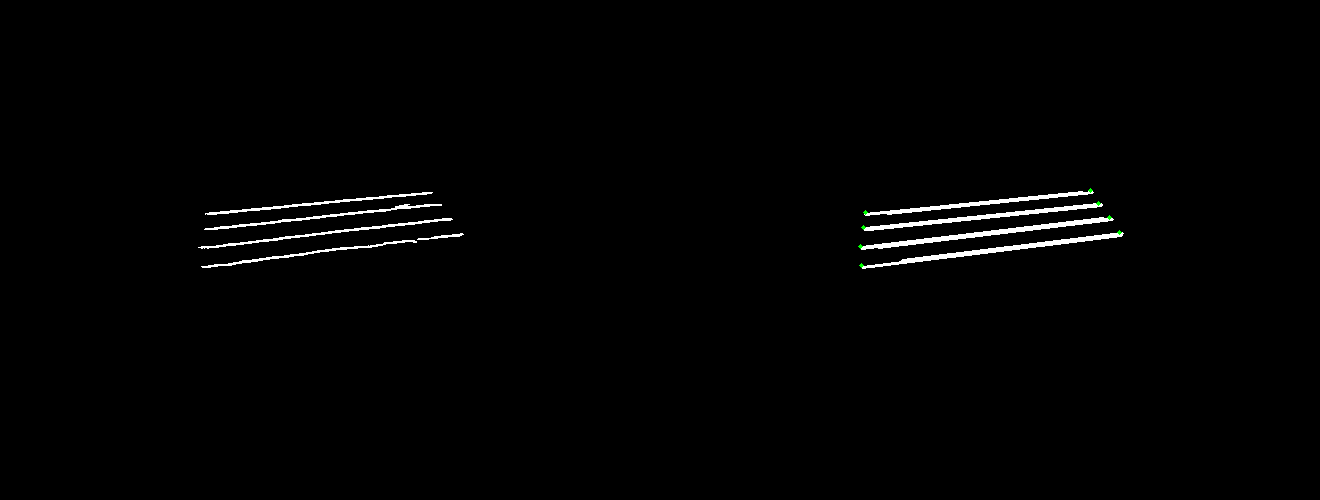

/content/drive/My Drive/Projects/Results_StairPose/mask/1490.png


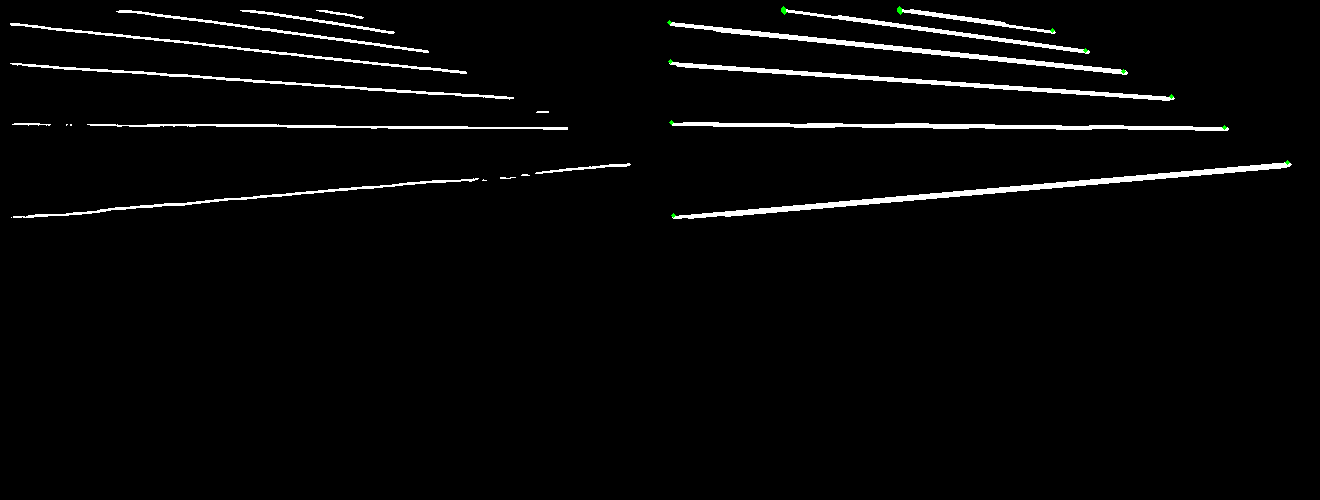

/content/drive/My Drive/Projects/Results_StairPose/mask/1491.png


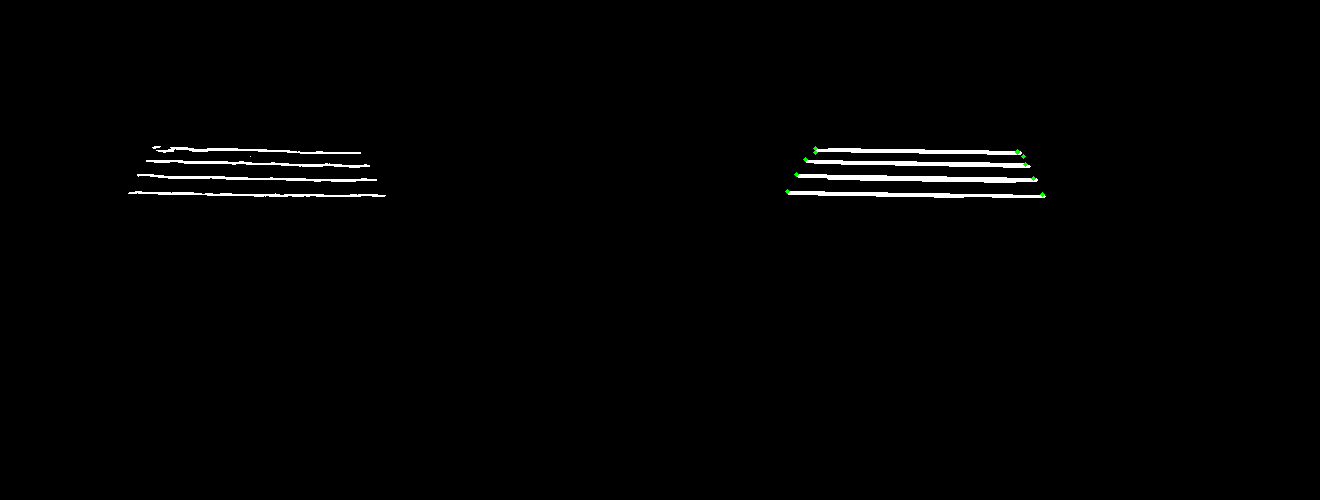

/content/drive/My Drive/Projects/Results_StairPose/mask/1492.png


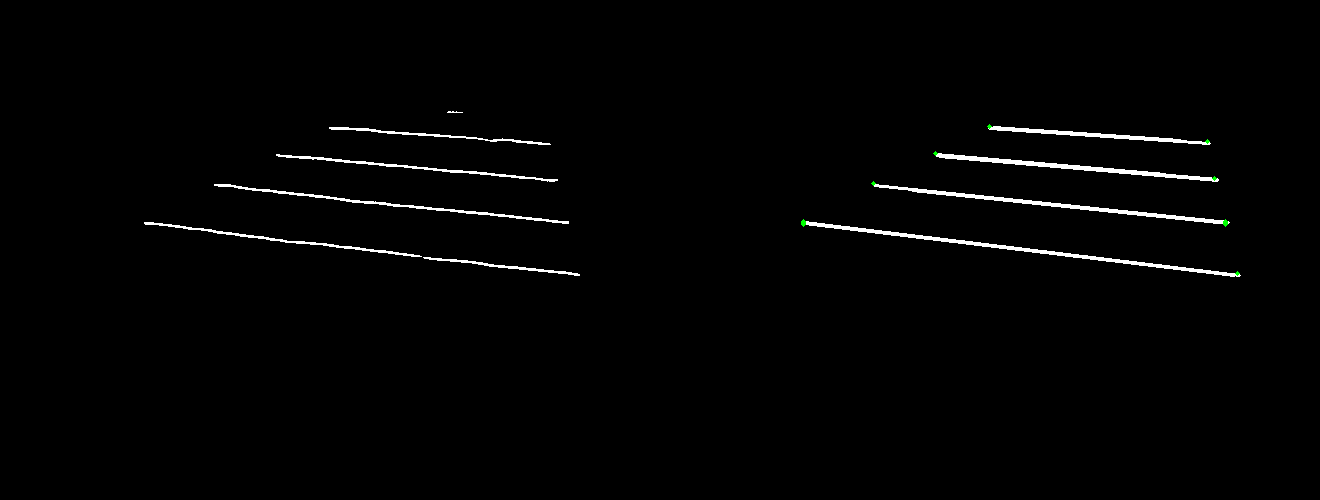

/content/drive/My Drive/Projects/Results_StairPose/mask/1493.png


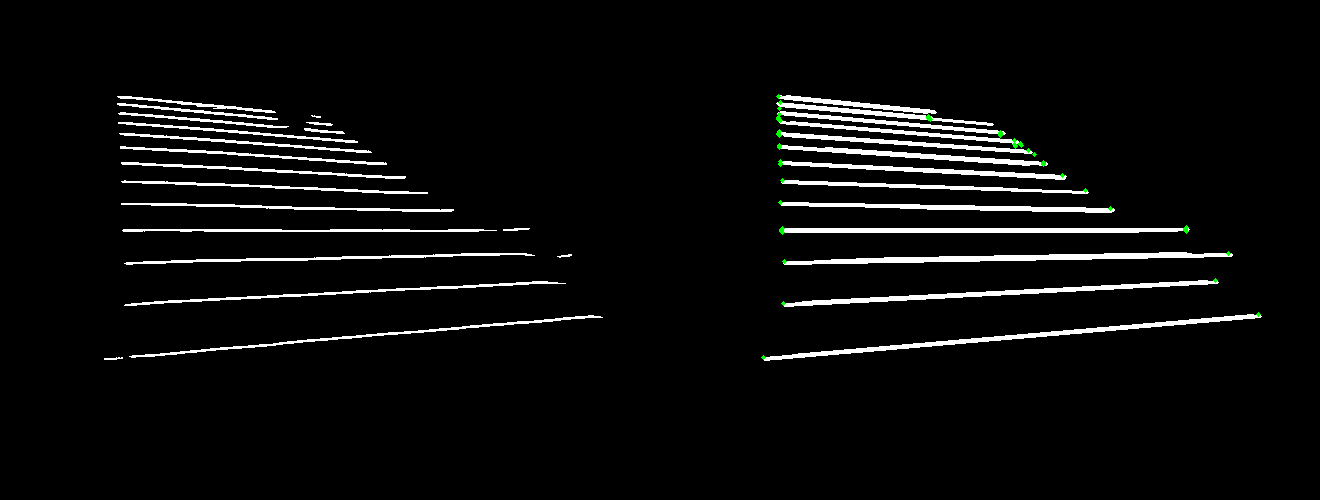

/content/drive/My Drive/Projects/Results_StairPose/mask/1494.png


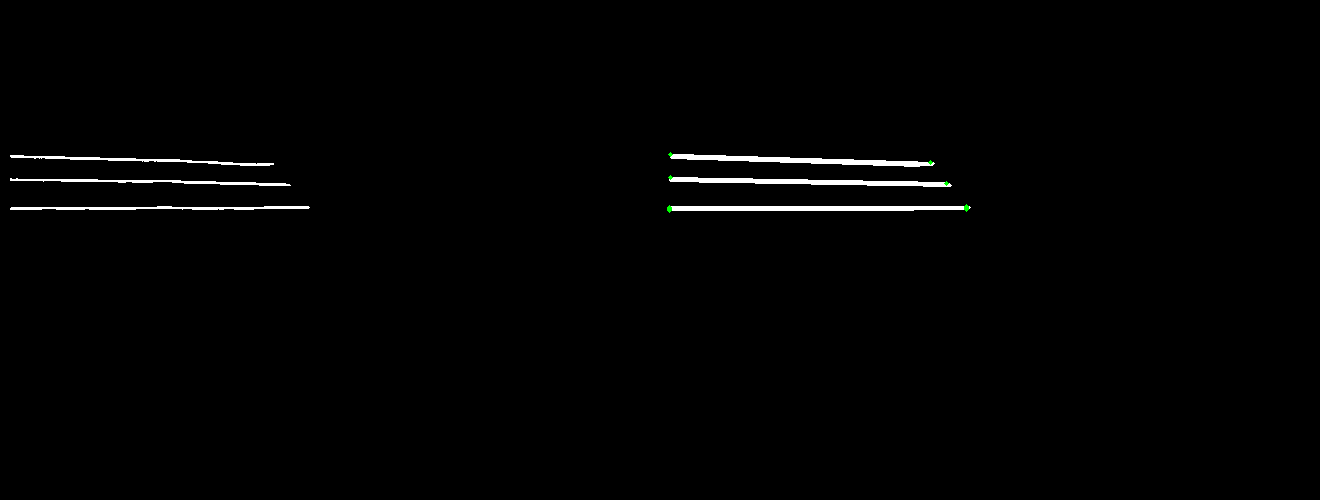

/content/drive/My Drive/Projects/Results_StairPose/mask/1495.png


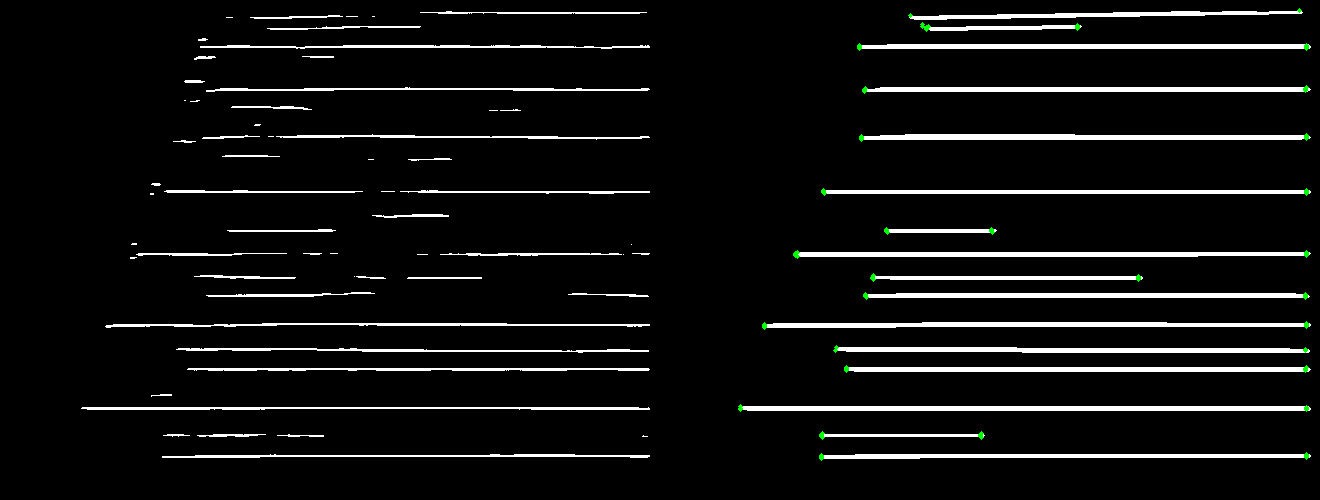

/content/drive/My Drive/Projects/Results_StairPose/mask/1496.png


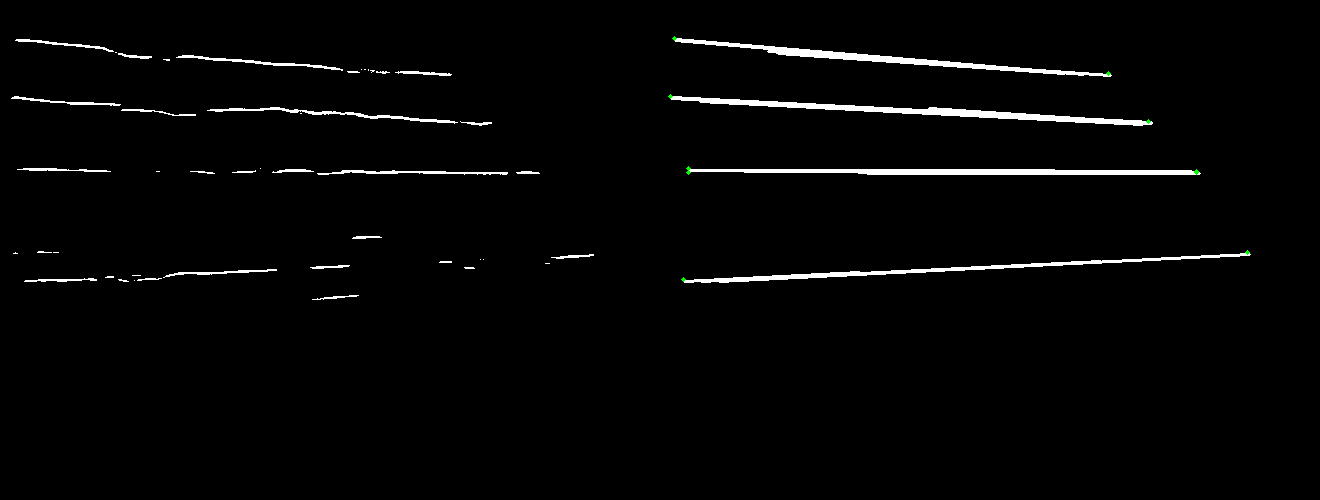

/content/drive/My Drive/Projects/Results_StairPose/mask/1497.png


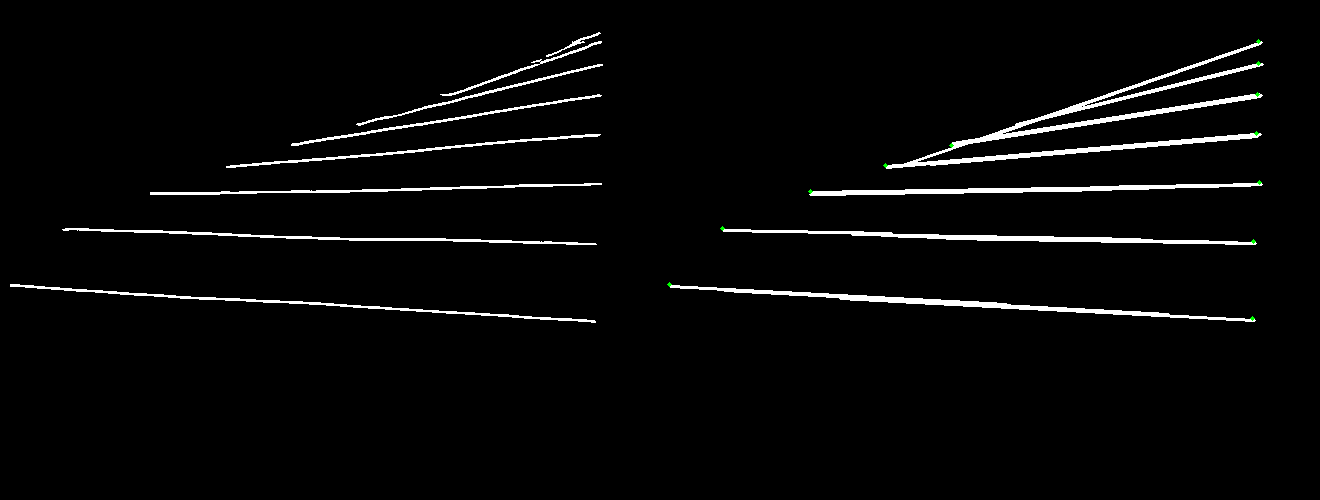

/content/drive/My Drive/Projects/Results_StairPose/mask/1498.png


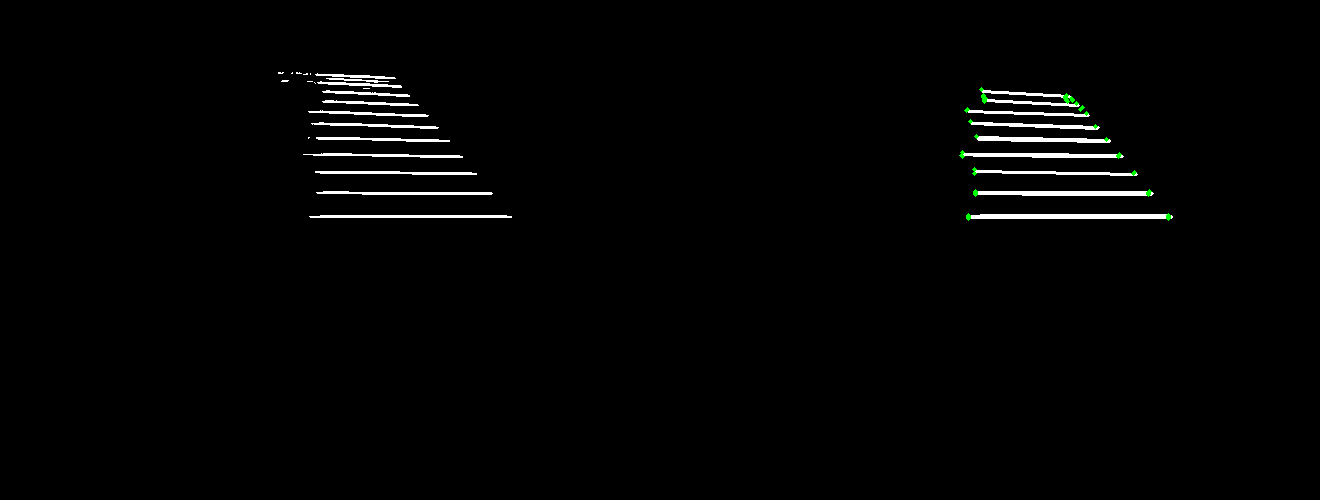

/content/drive/My Drive/Projects/Results_StairPose/mask/1499.png


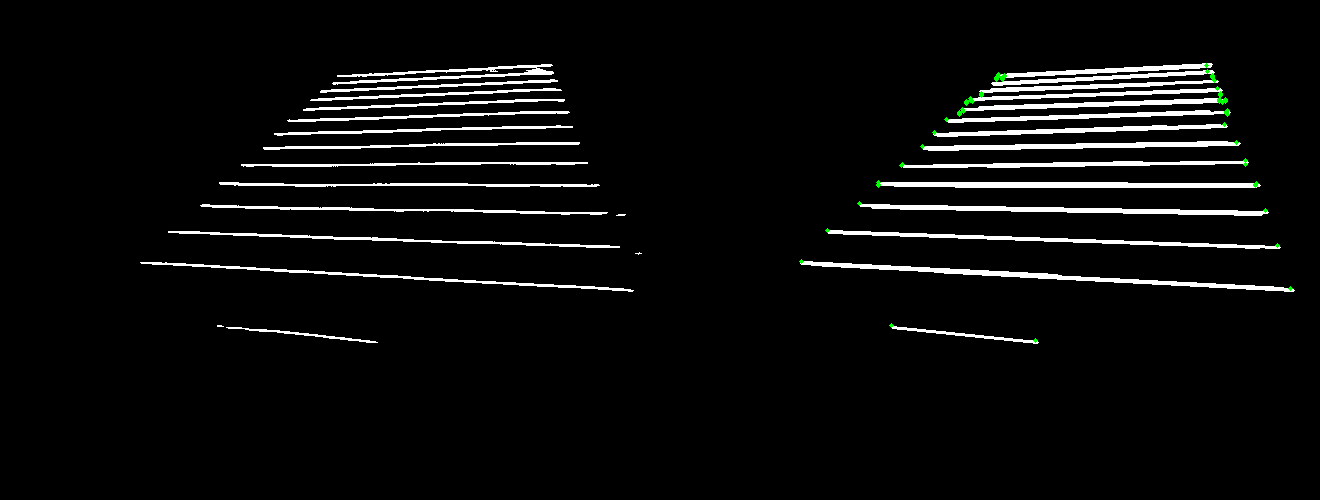

/content/drive/My Drive/Projects/Results_StairPose/mask/1500.png


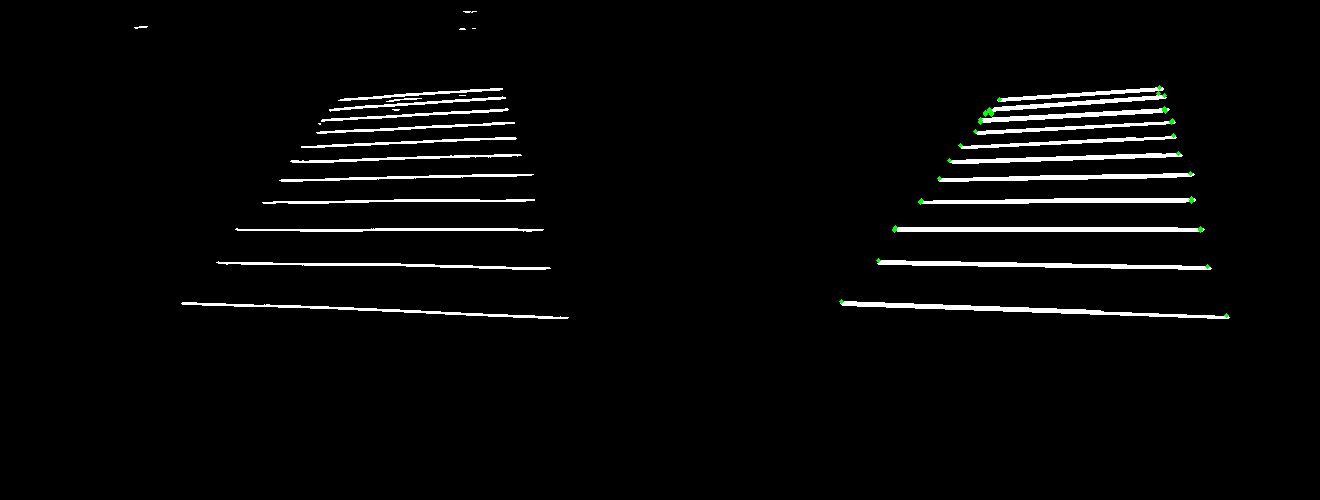

/content/drive/My Drive/Projects/Results_StairPose/mask/1501.png


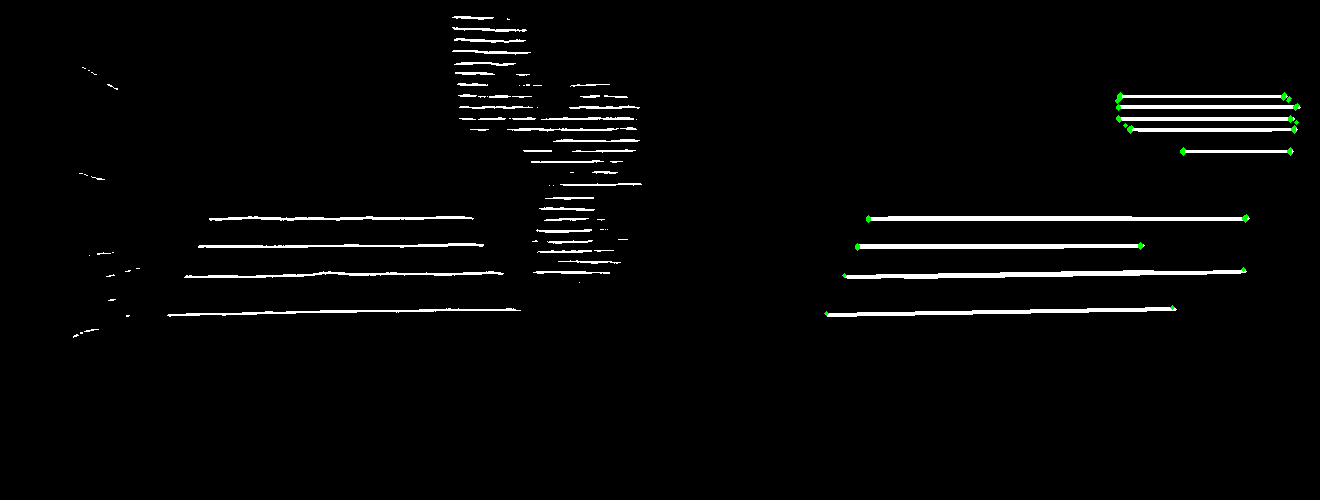

/content/drive/My Drive/Projects/Results_StairPose/mask/1503.png


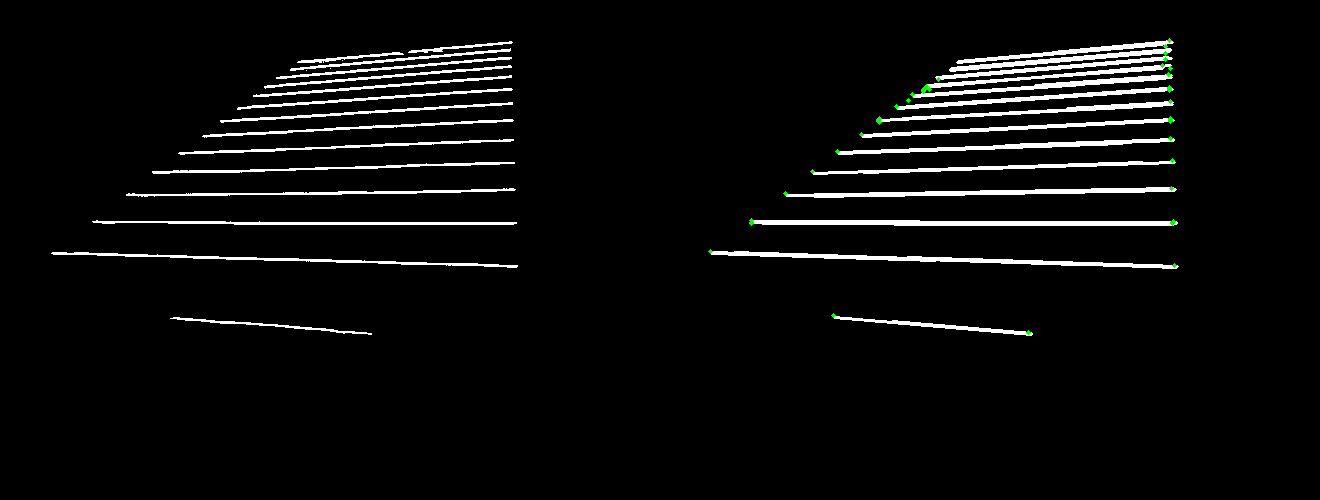

/content/drive/My Drive/Projects/Results_StairPose/mask/1504.png


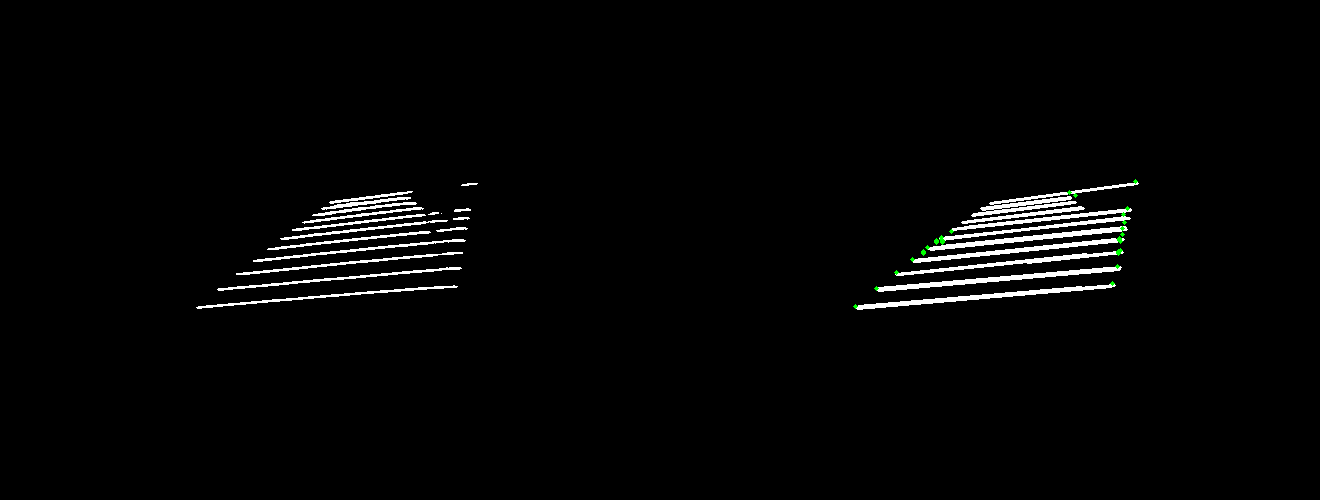

/content/drive/My Drive/Projects/Results_StairPose/mask/1505.png


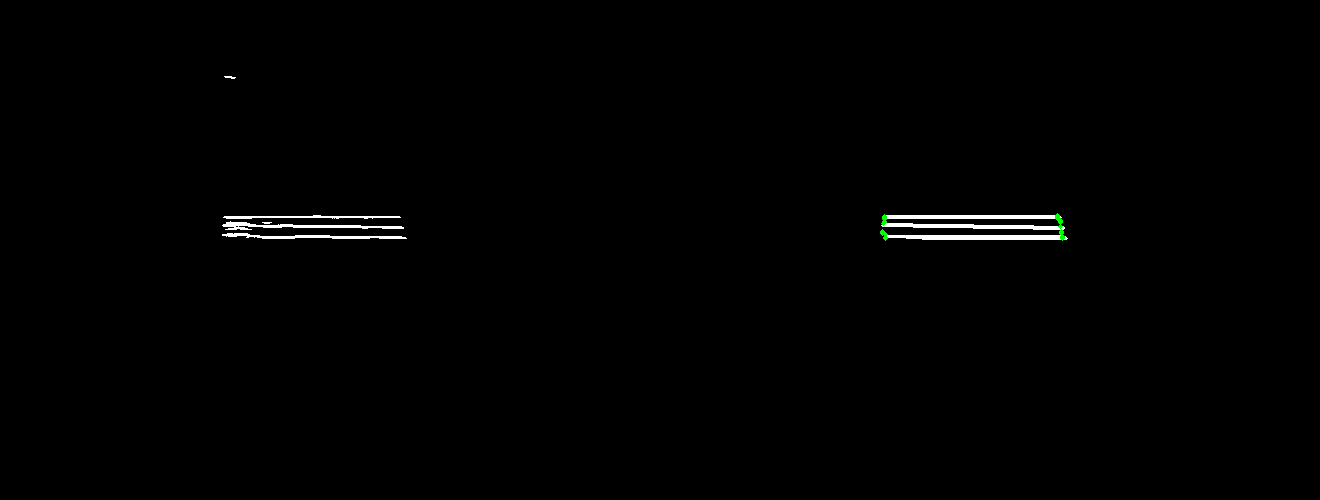

/content/drive/My Drive/Projects/Results_StairPose/mask/1506.png


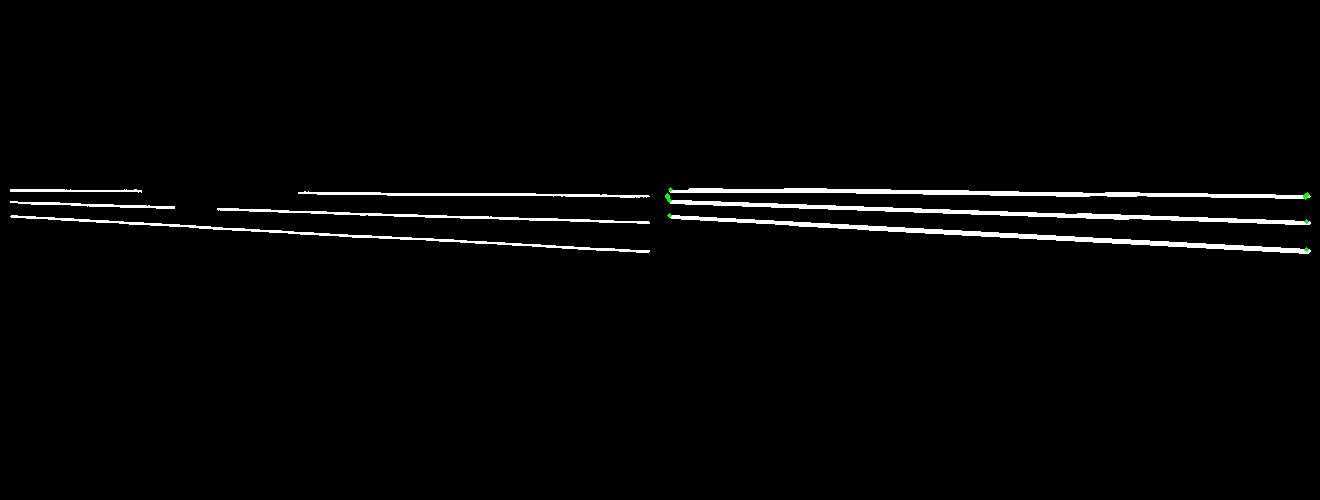

/content/drive/My Drive/Projects/Results_StairPose/mask/1507.png


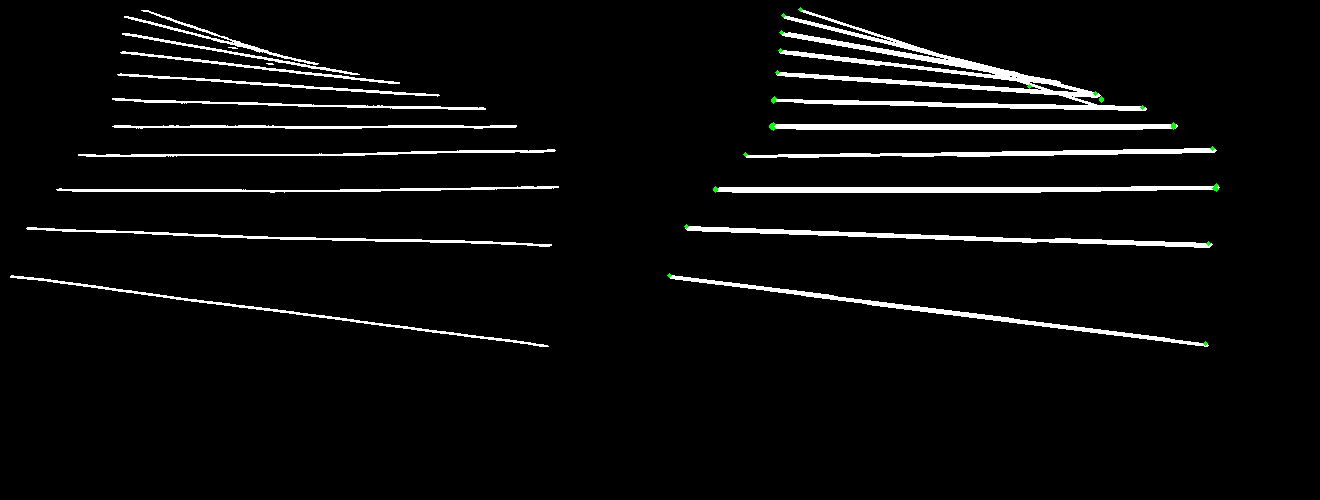

/content/drive/My Drive/Projects/Results_StairPose/mask/1509.png


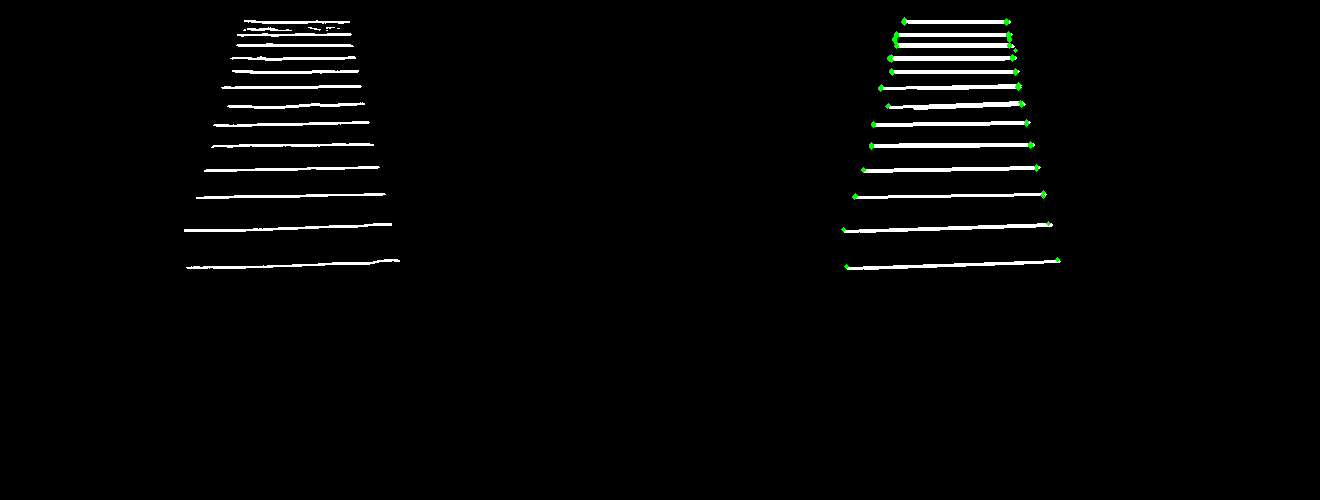

/content/drive/My Drive/Projects/Results_StairPose/mask/1510.png


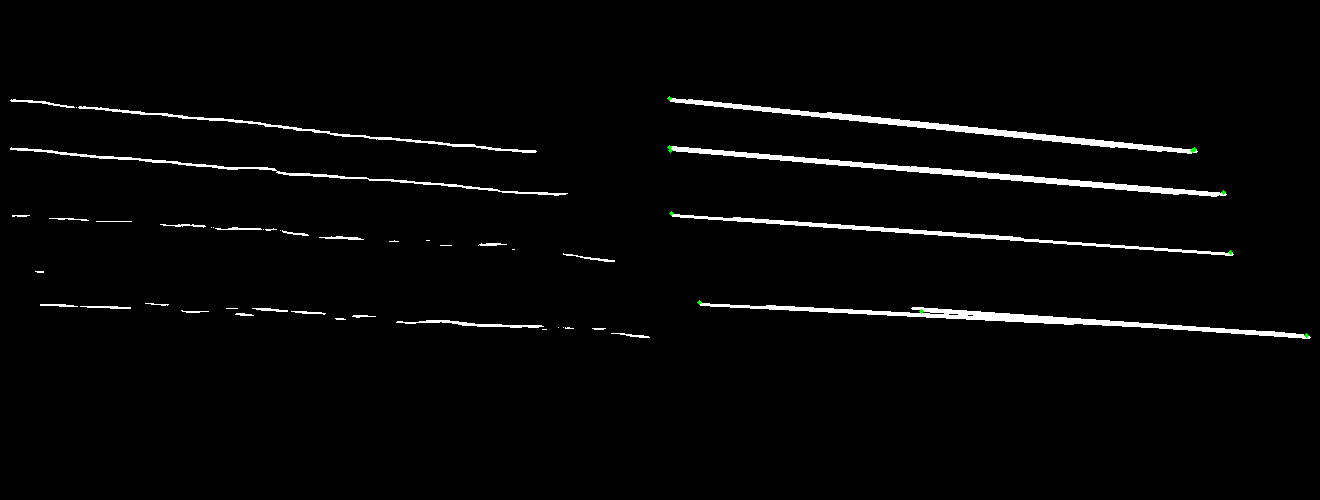

/content/drive/My Drive/Projects/Results_StairPose/mask/1511.png


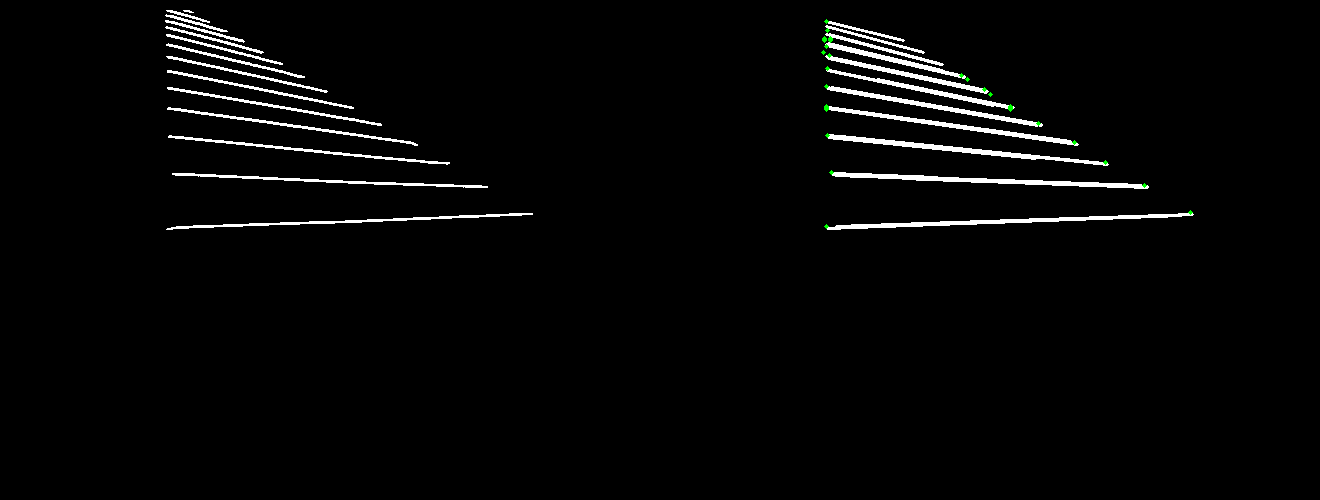

/content/drive/My Drive/Projects/Results_StairPose/mask/1512.png


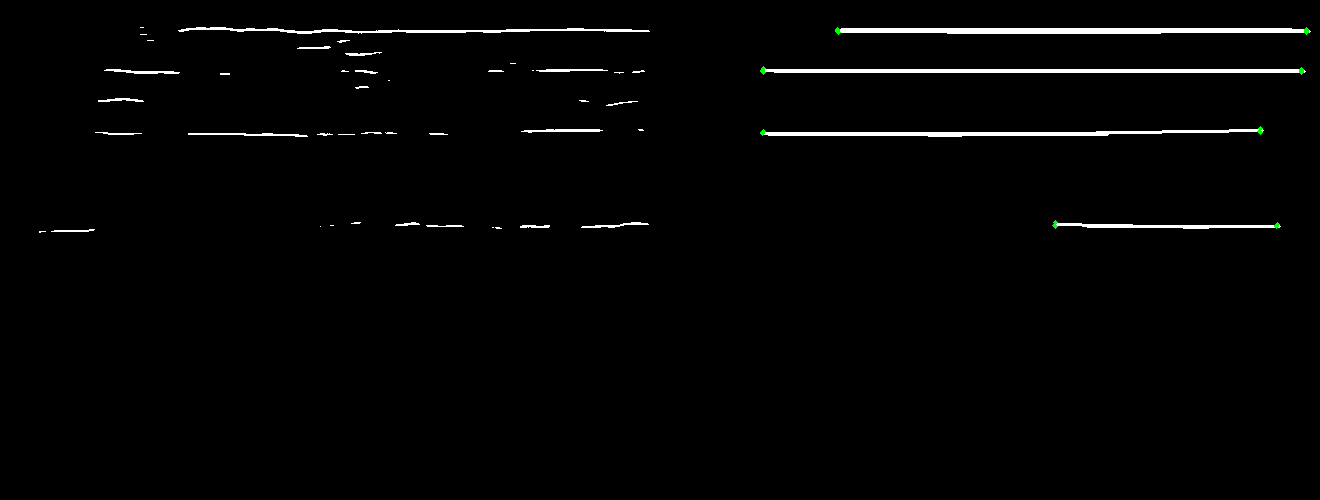

/content/drive/My Drive/Projects/Results_StairPose/mask/1514.png


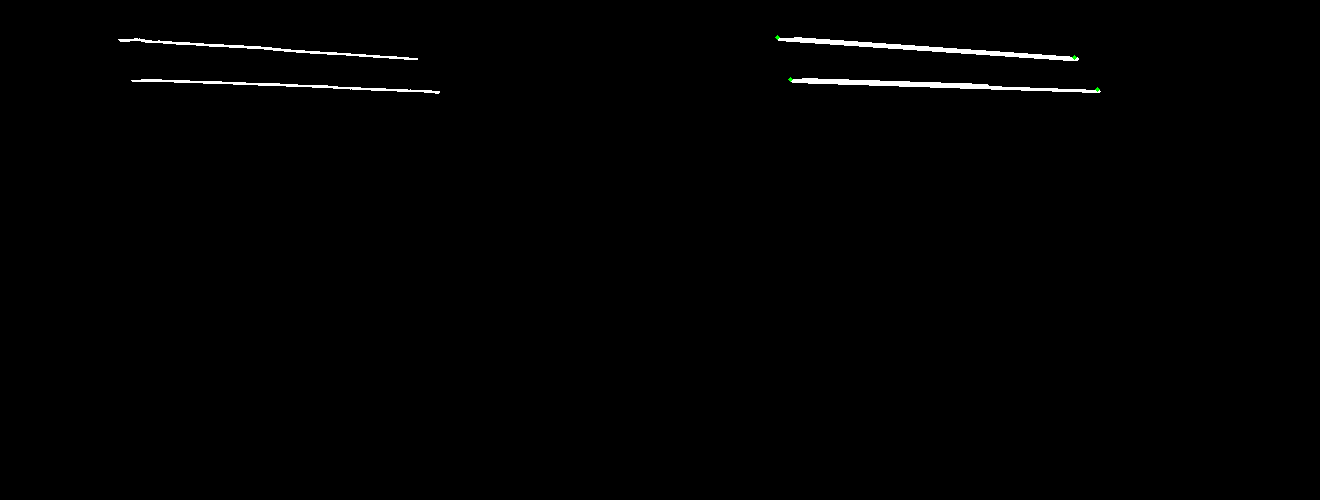

/content/drive/My Drive/Projects/Results_StairPose/mask/1515.png


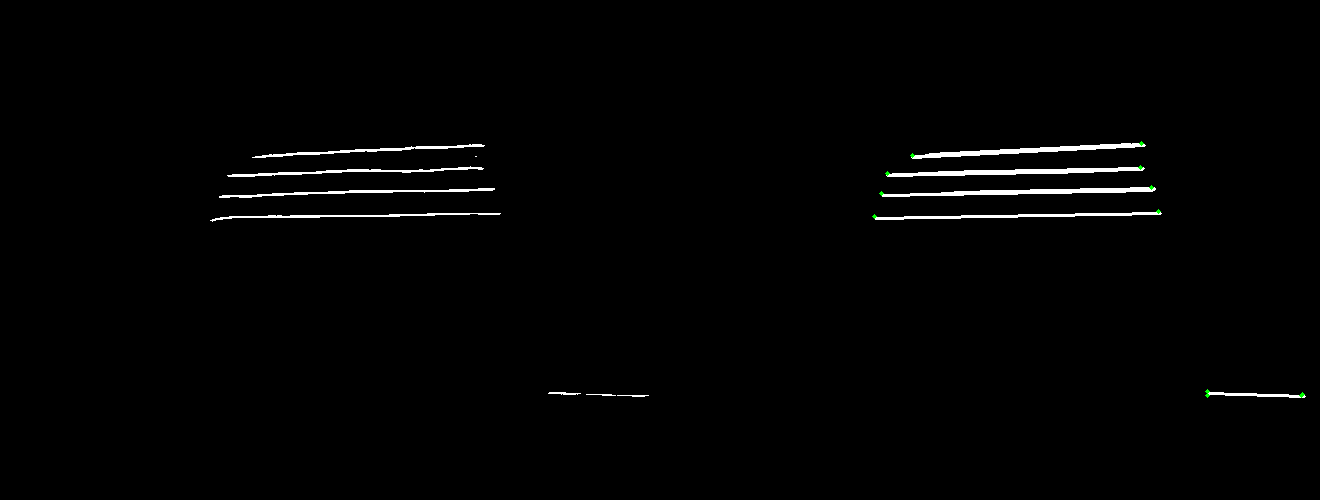

/content/drive/My Drive/Projects/Results_StairPose/mask/1516.png


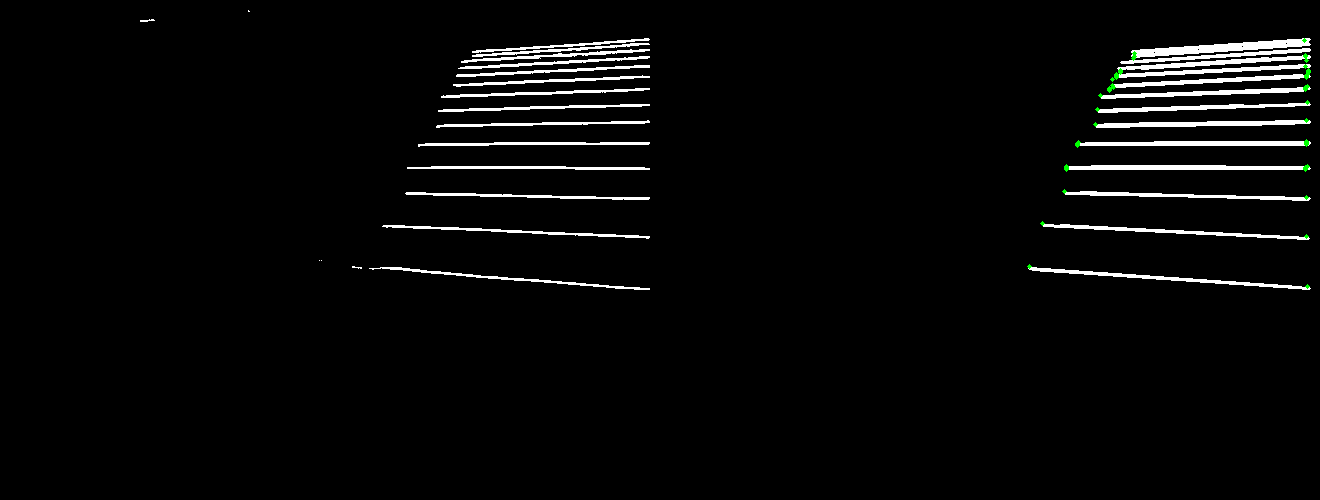

/content/drive/My Drive/Projects/Results_StairPose/mask/1517.png


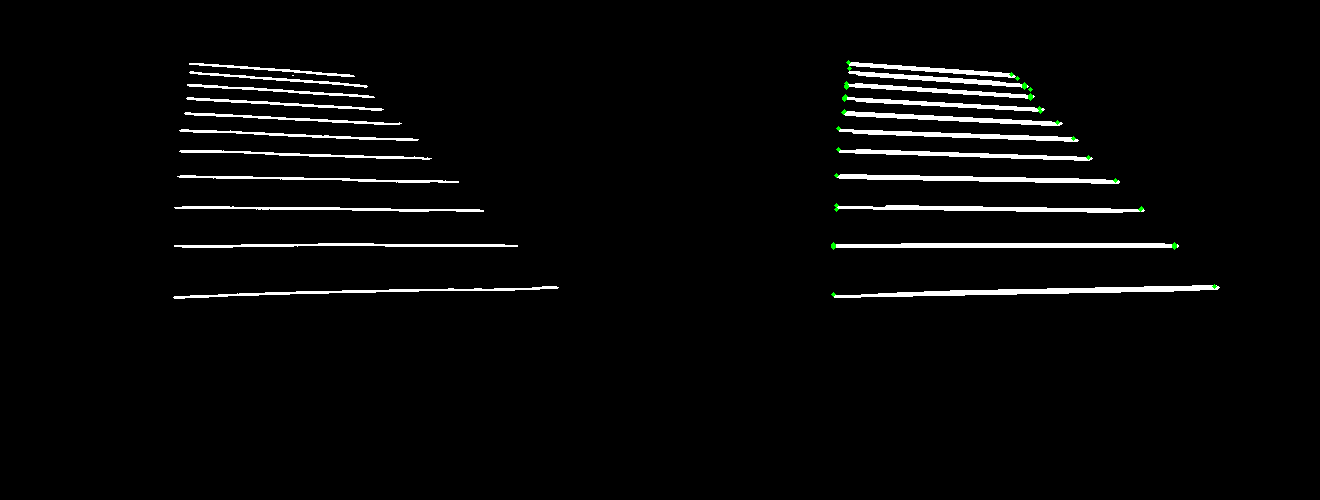

/content/drive/My Drive/Projects/Results_StairPose/mask/1518.png


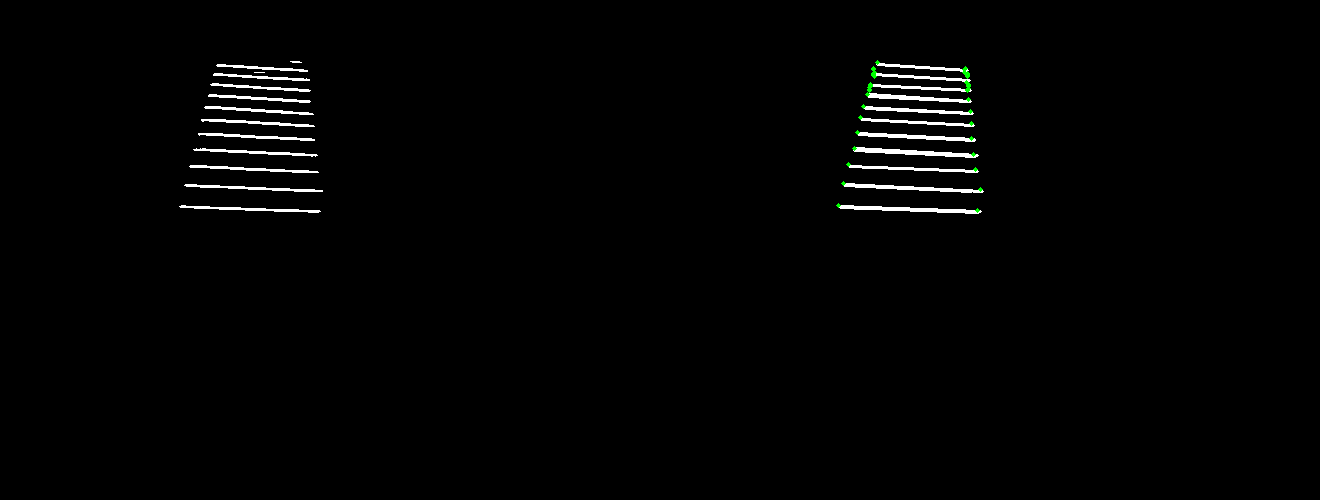

/content/drive/My Drive/Projects/Results_StairPose/mask/1519.png


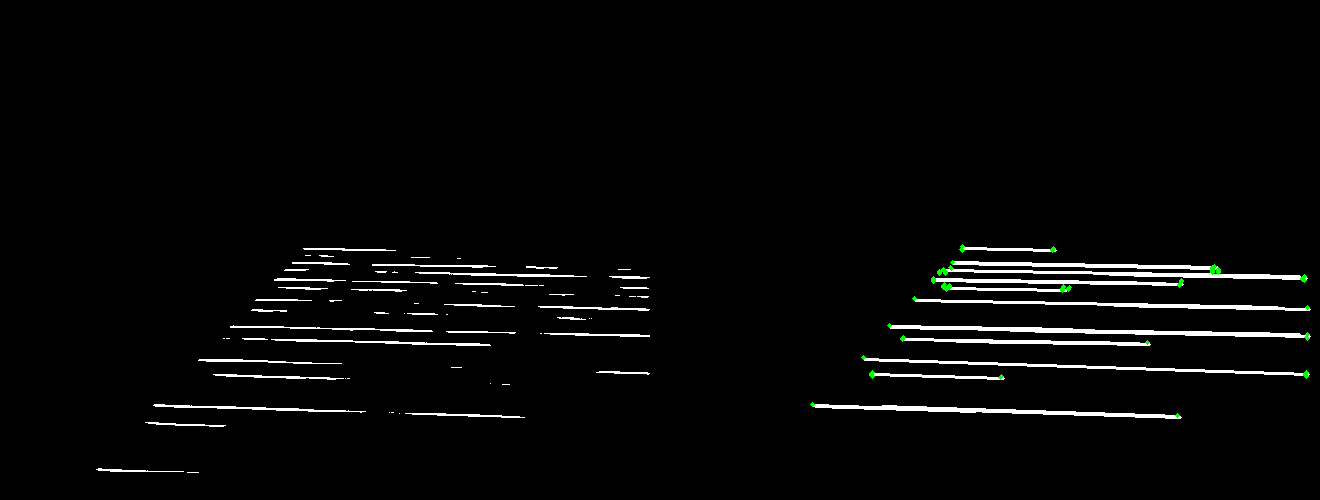

/content/drive/My Drive/Projects/Results_StairPose/mask/1520.png


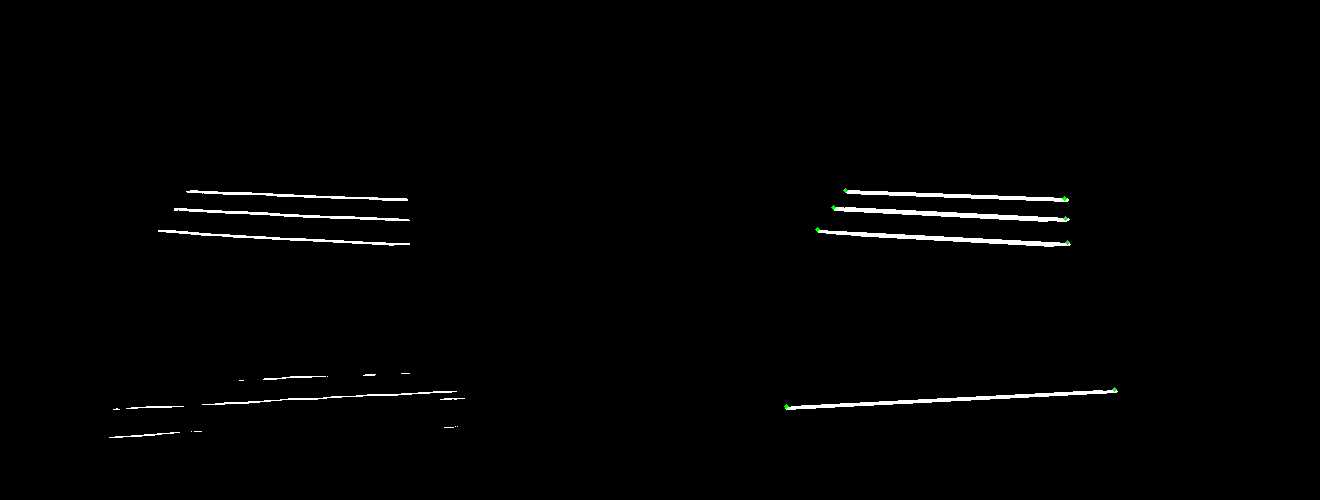

/content/drive/My Drive/Projects/Results_StairPose/mask/1521.png


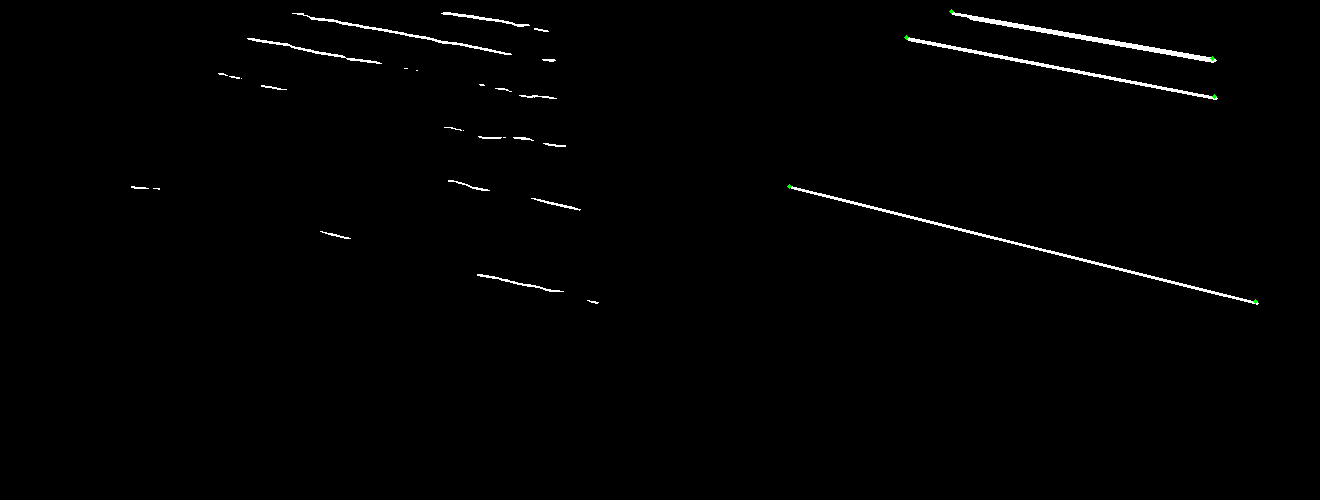

/content/drive/My Drive/Projects/Results_StairPose/mask/1522.png


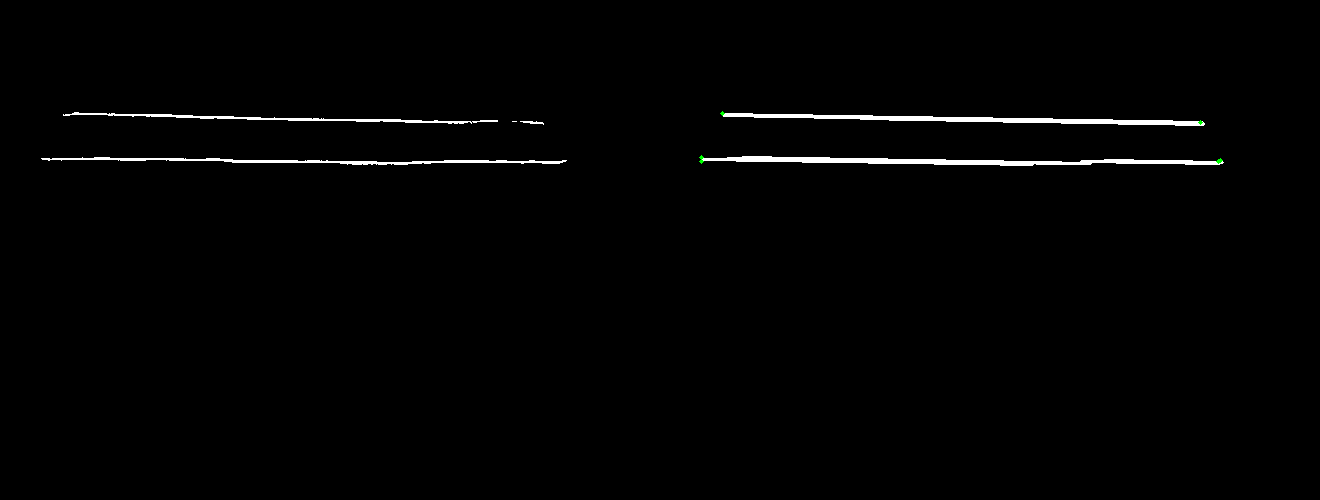

/content/drive/My Drive/Projects/Results_StairPose/mask/1523.png


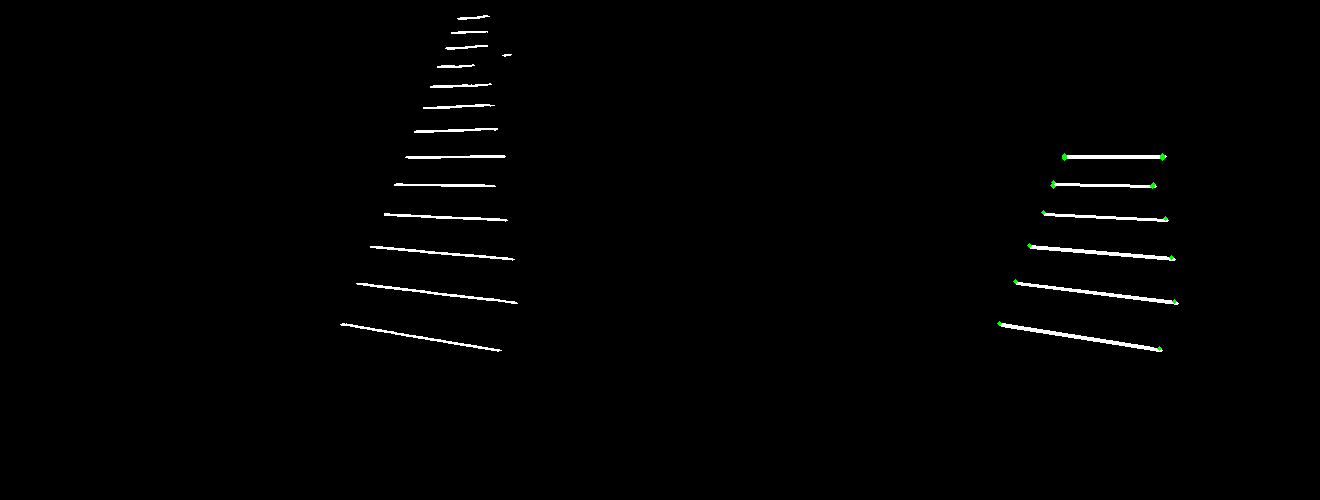

/content/drive/My Drive/Projects/Results_StairPose/mask/1524.png


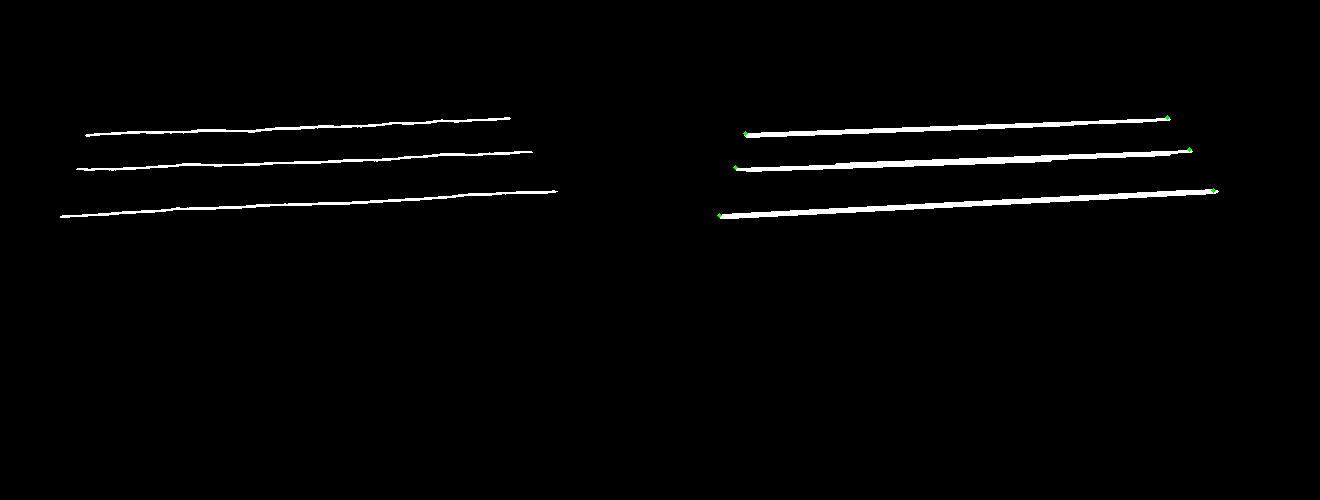

/content/drive/My Drive/Projects/Results_StairPose/mask/1525.png


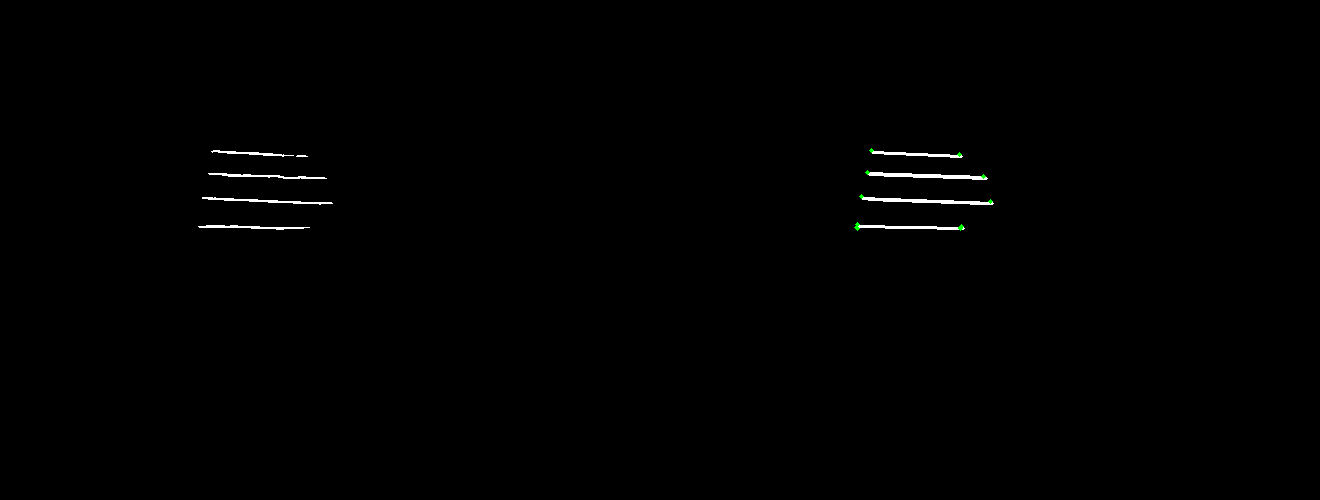

/content/drive/My Drive/Projects/Results_StairPose/mask/1526.png


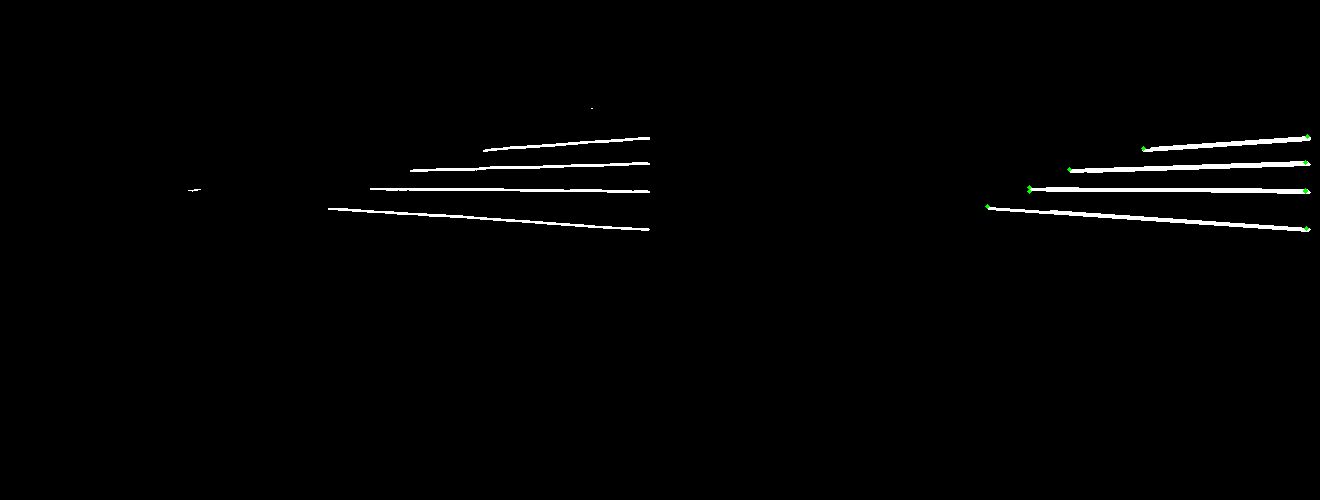

/content/drive/My Drive/Projects/Results_StairPose/mask/1527.png


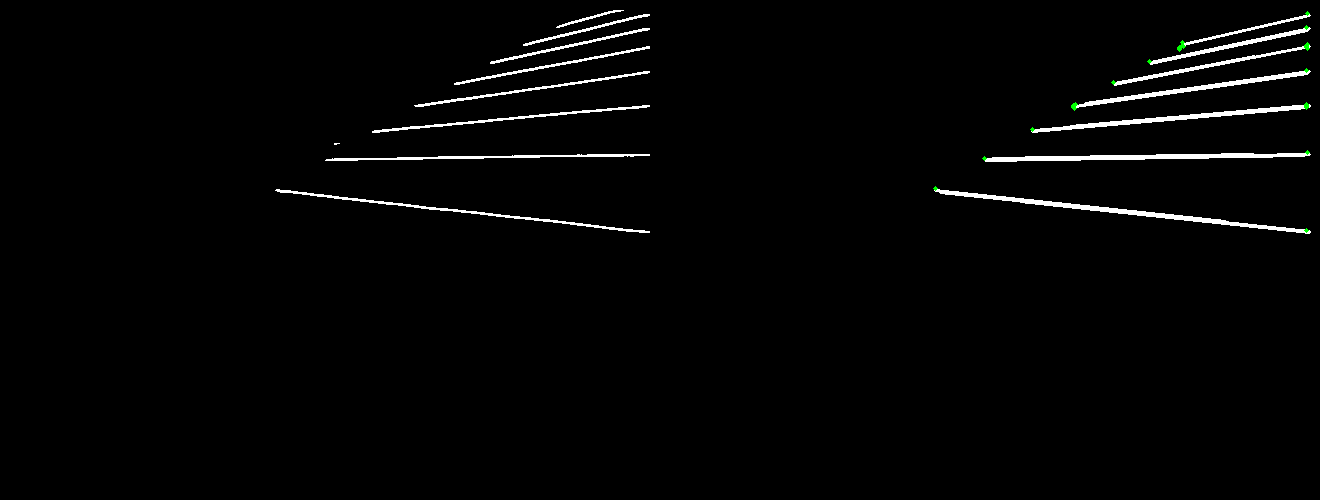

/content/drive/My Drive/Projects/Results_StairPose/mask/1529.png


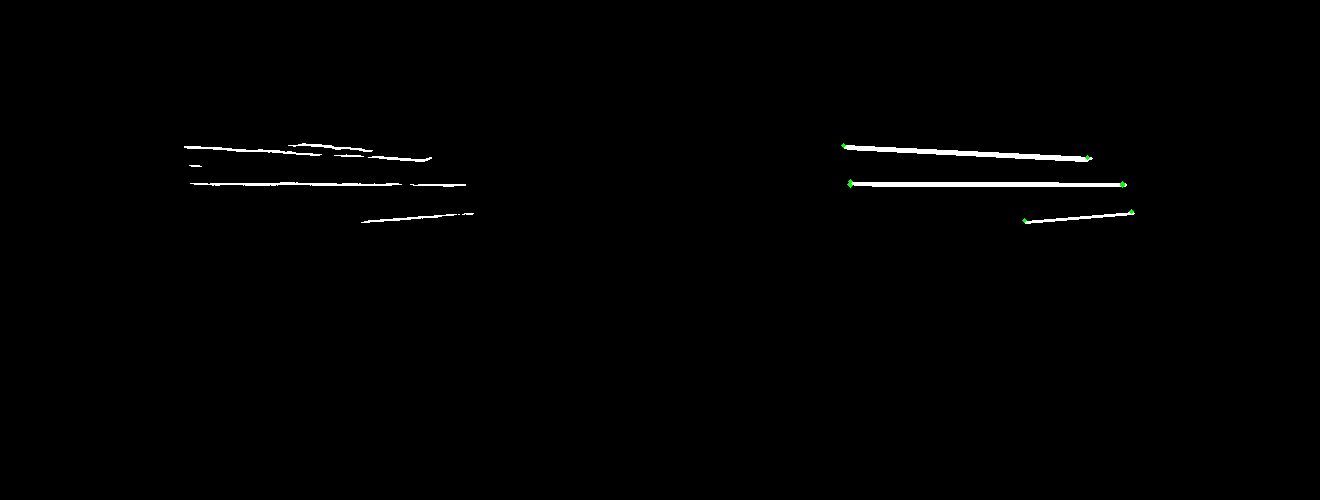

/content/drive/My Drive/Projects/Results_StairPose/mask/1530.png


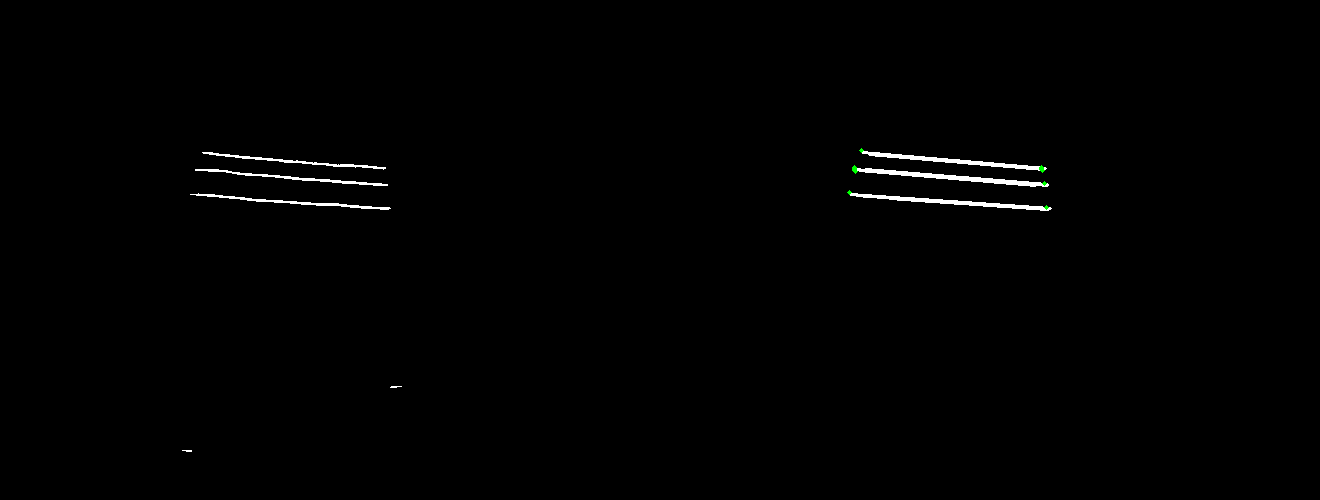

/content/drive/My Drive/Projects/Results_StairPose/mask/1531.png


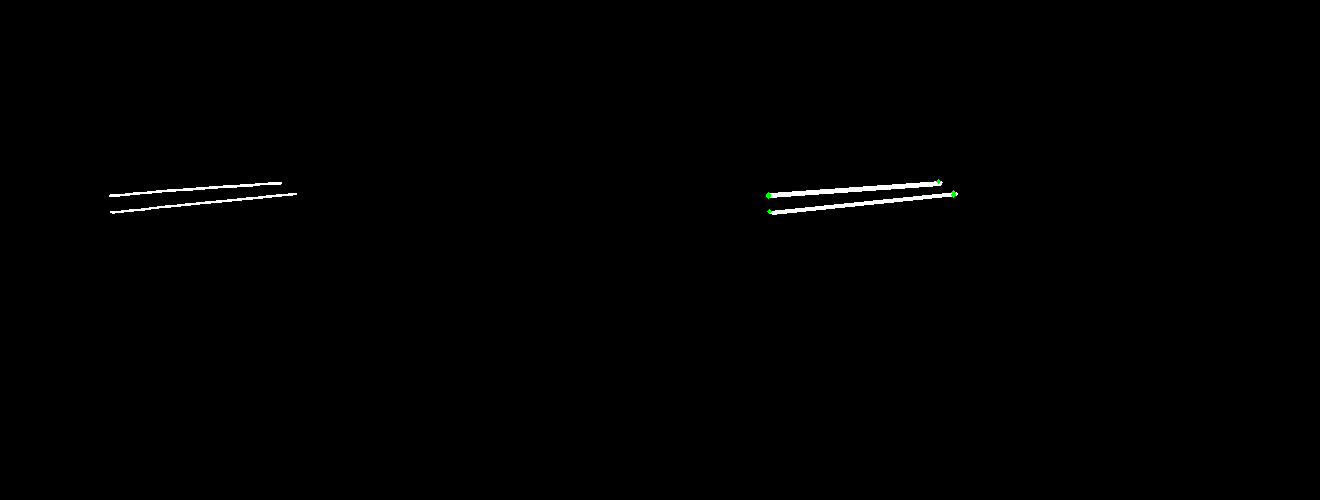

/content/drive/My Drive/Projects/Results_StairPose/mask/1532.png


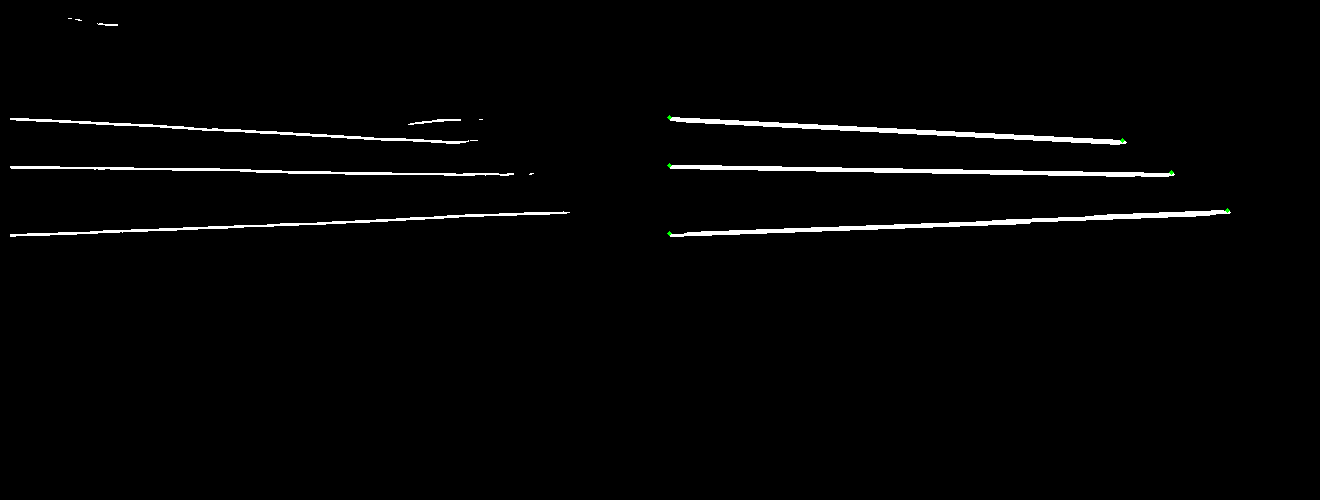

/content/drive/My Drive/Projects/Results_StairPose/mask/1536.png


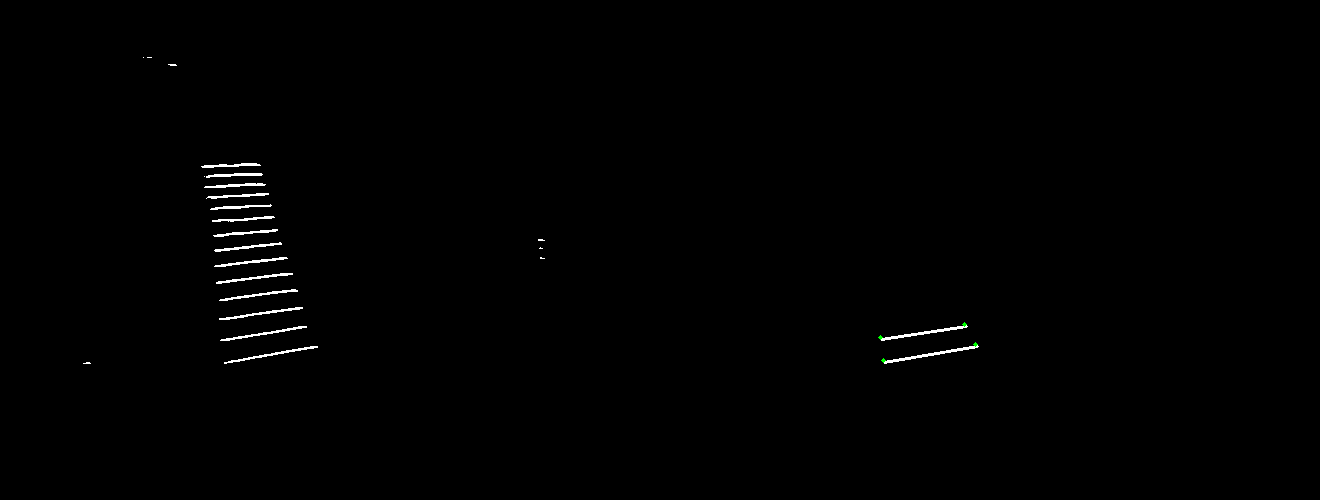

/content/drive/My Drive/Projects/Results_StairPose/mask/1537.png


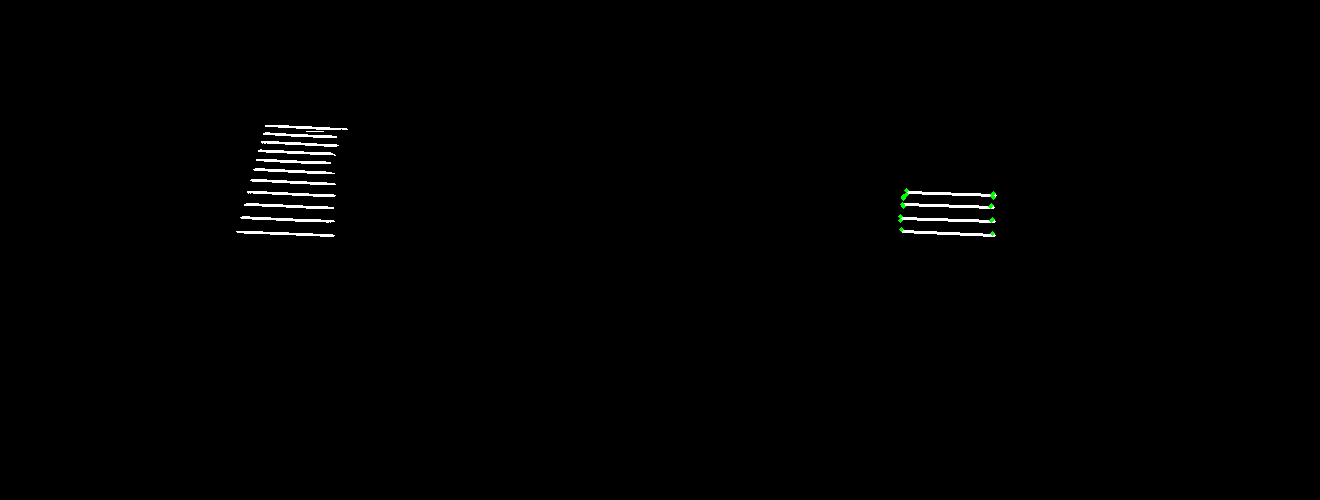

/content/drive/My Drive/Projects/Results_StairPose/mask/1538.png


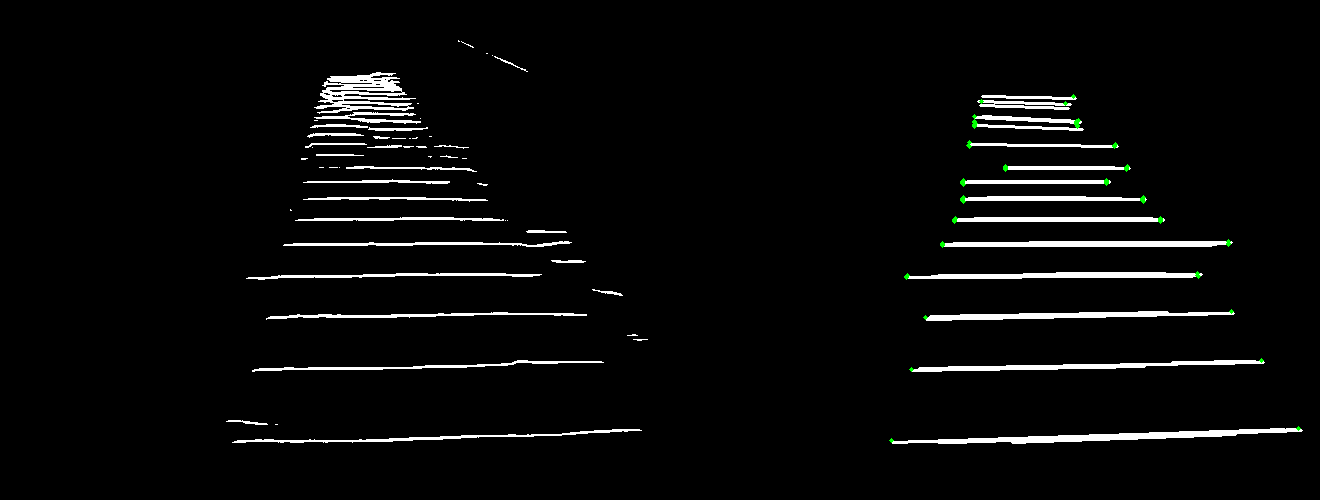

/content/drive/My Drive/Projects/Results_StairPose/mask/1539.png


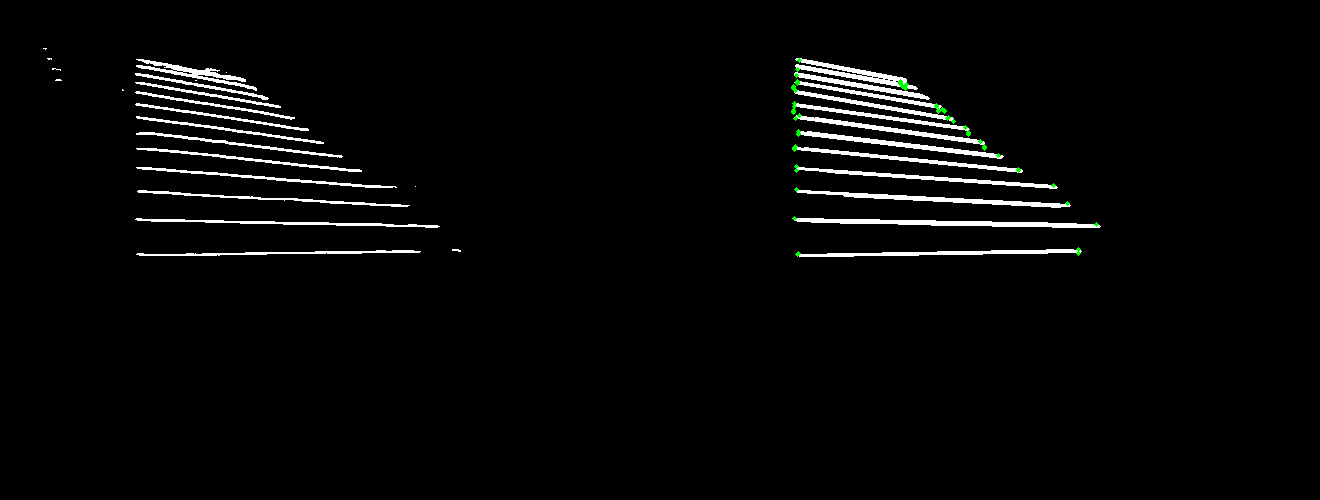

/content/drive/My Drive/Projects/Results_StairPose/mask/1540.png


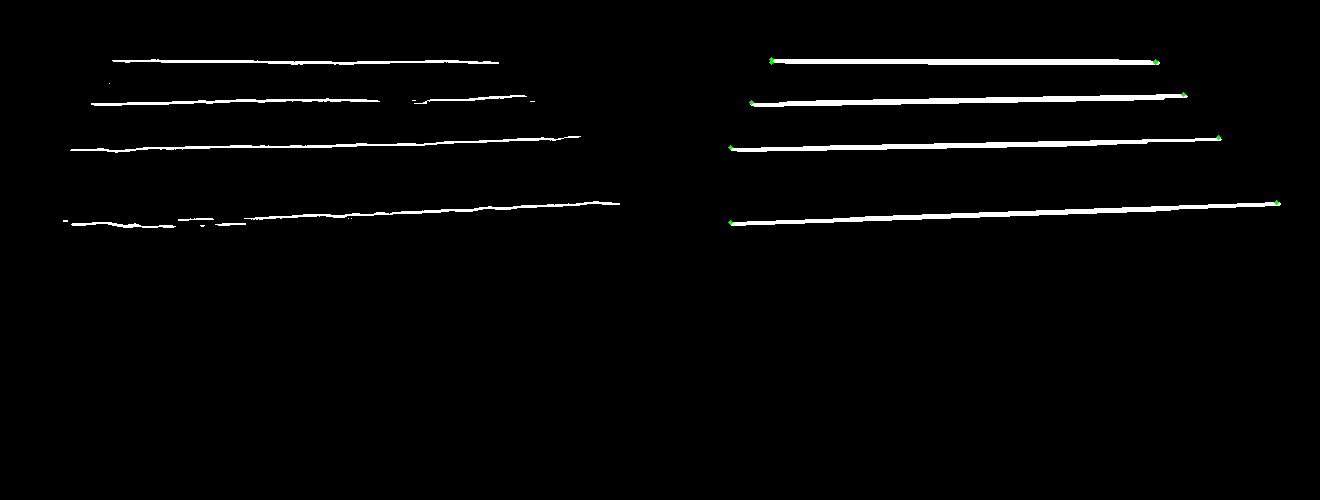

/content/drive/My Drive/Projects/Results_StairPose/mask/1541.png


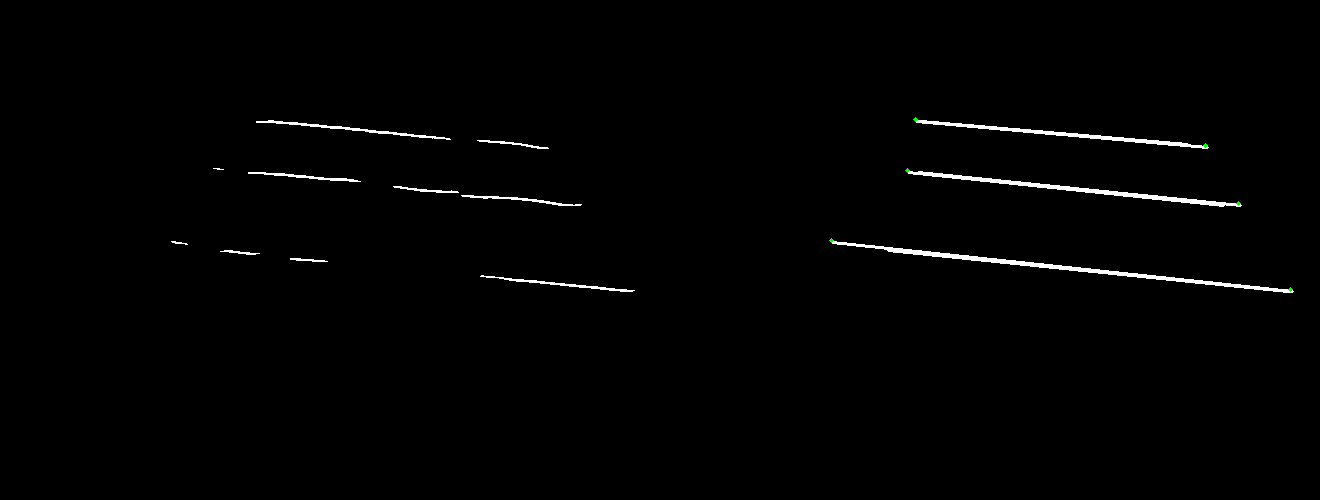

/content/drive/My Drive/Projects/Results_StairPose/mask/1542.png


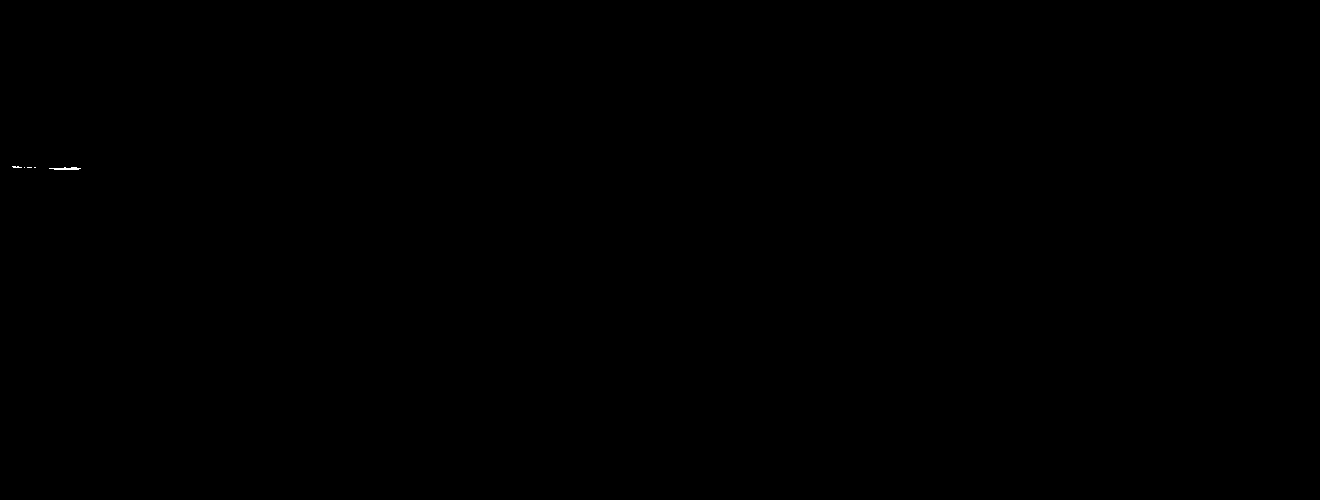

/content/drive/My Drive/Projects/Results_StairPose/mask/1543.png


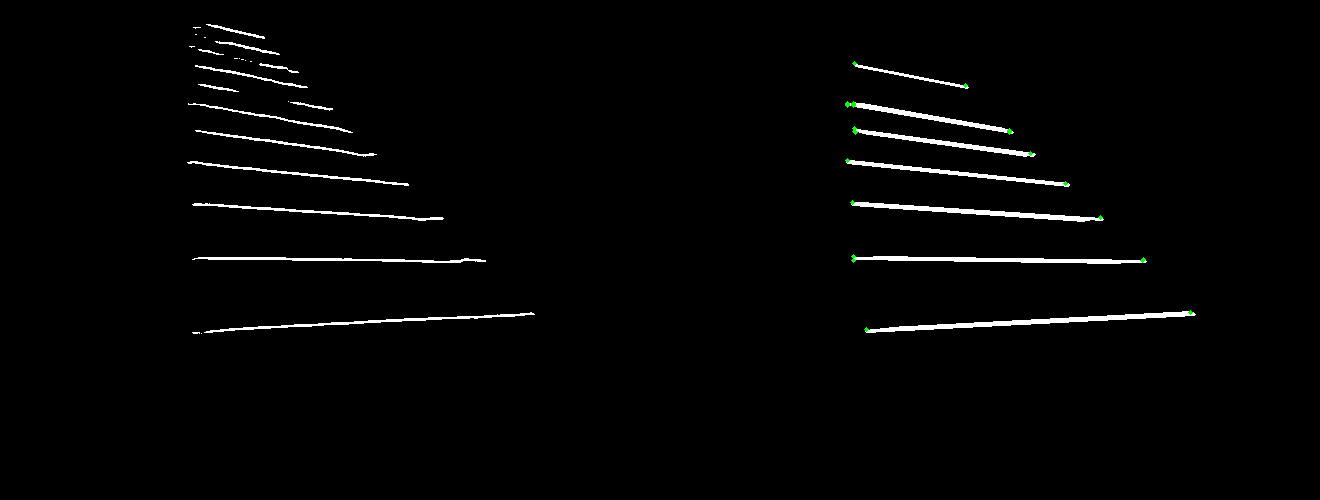

/content/drive/My Drive/Projects/Results_StairPose/mask/1544.png


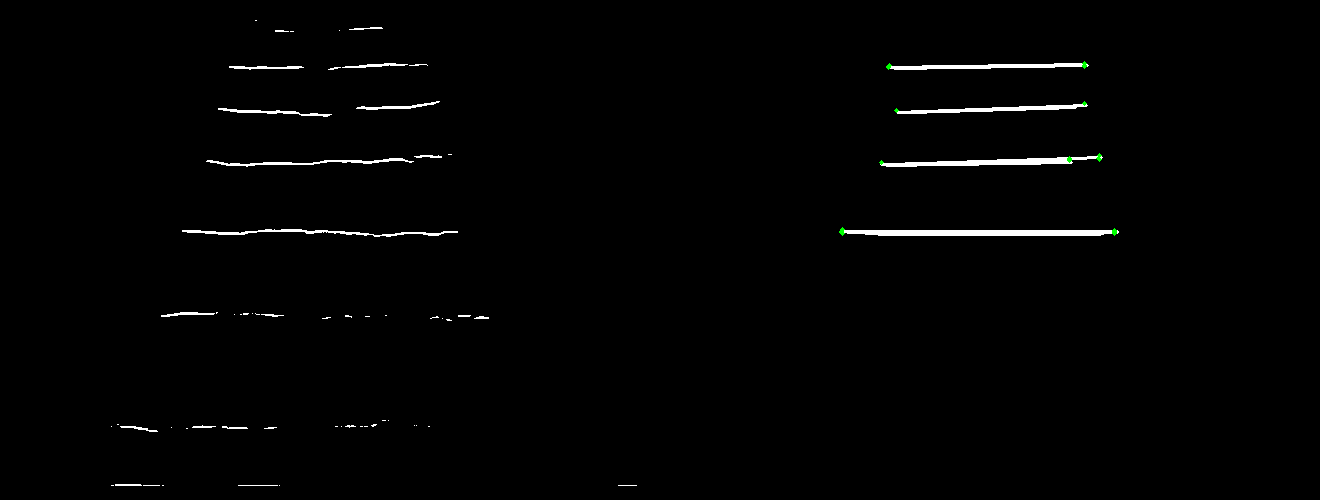

/content/drive/My Drive/Projects/Results_StairPose/mask/1545.png


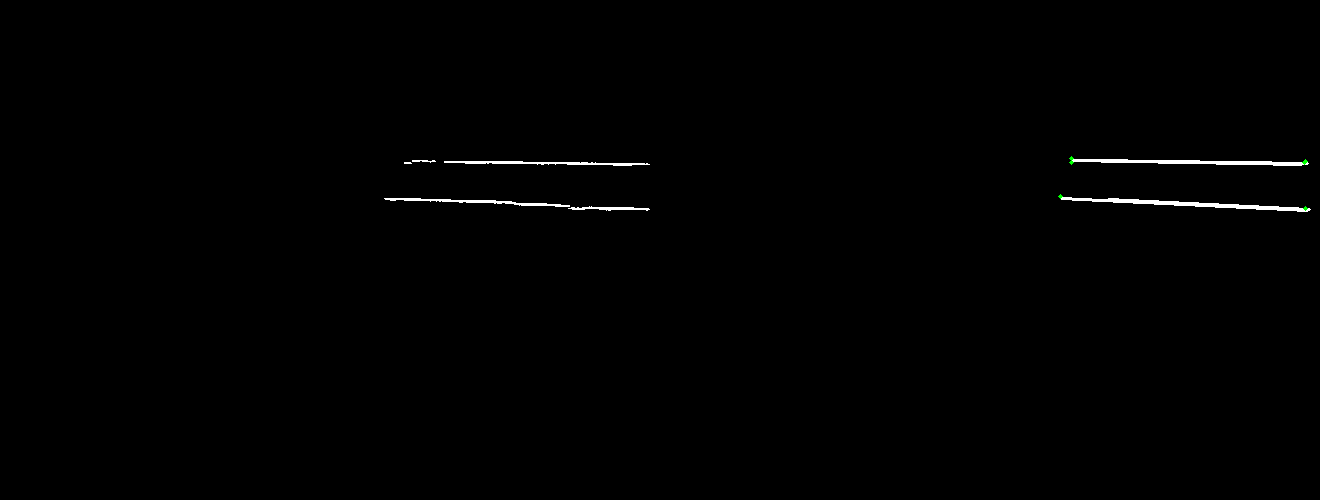

/content/drive/My Drive/Projects/Results_StairPose/mask/1546.png


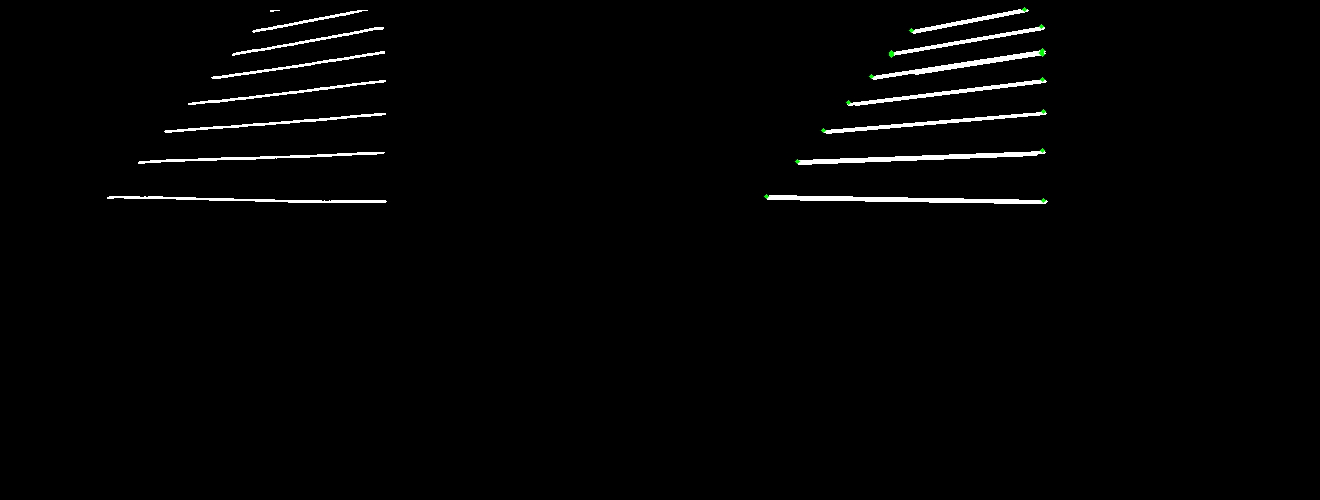

/content/drive/My Drive/Projects/Results_StairPose/mask/1547.png


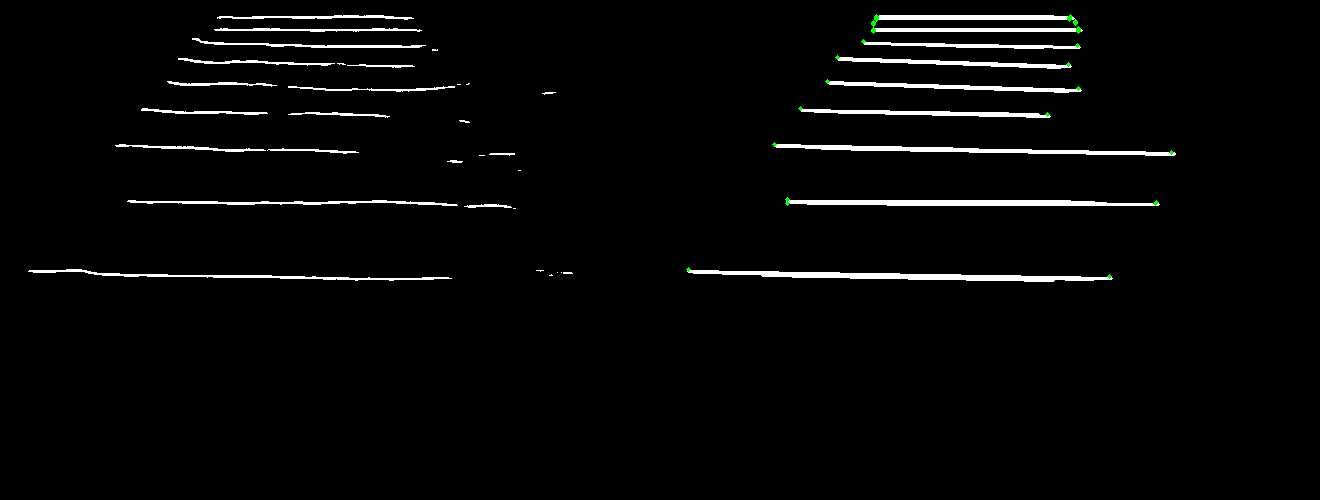

/content/drive/My Drive/Projects/Results_StairPose/mask/1548.png


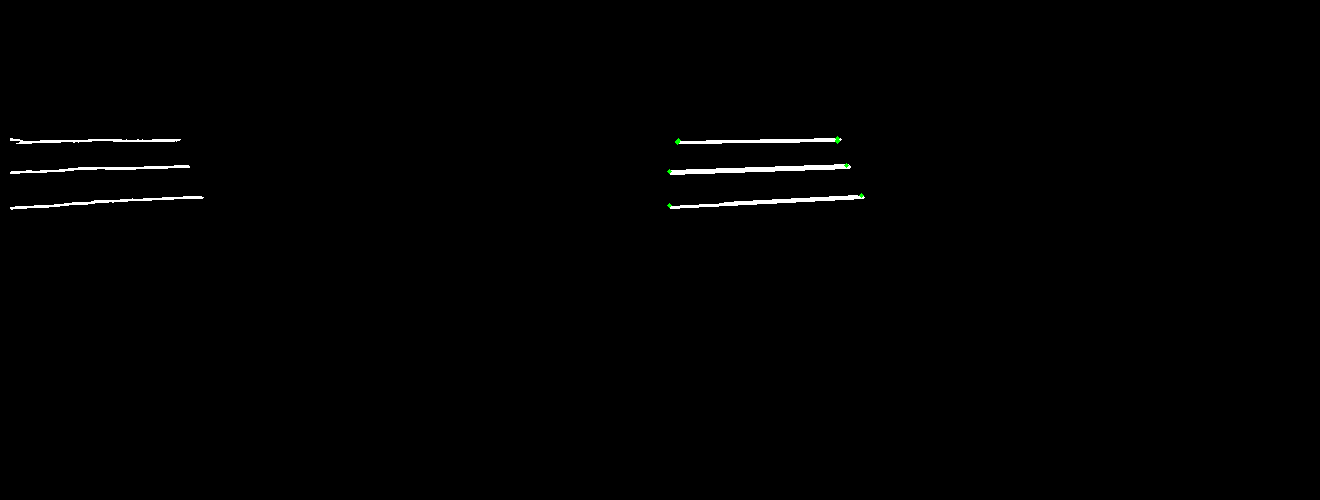

/content/drive/My Drive/Projects/Results_StairPose/mask/1550.png


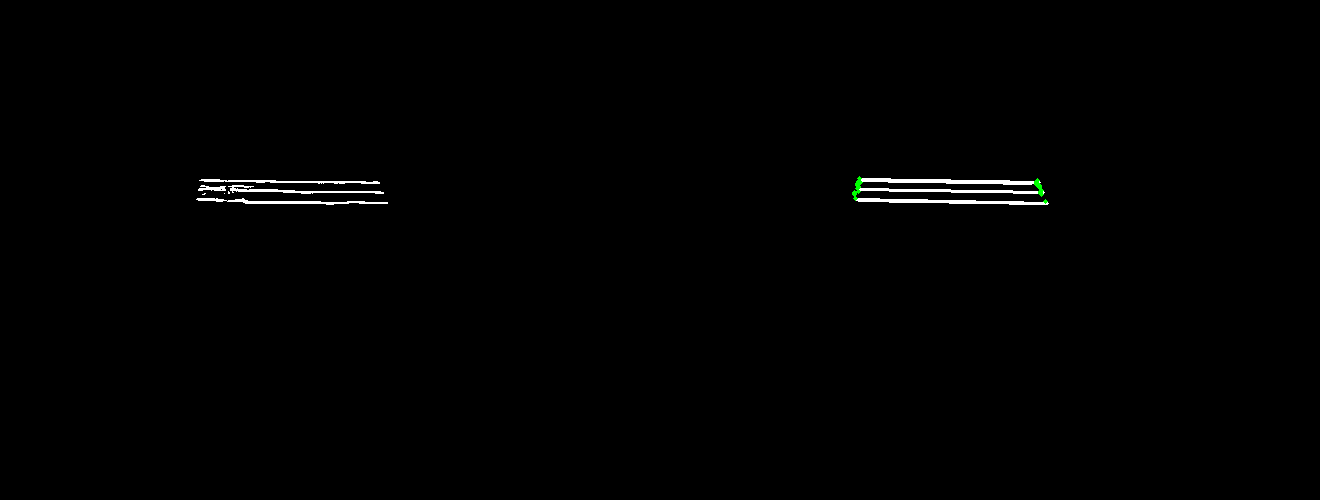

/content/drive/My Drive/Projects/Results_StairPose/mask/1552.png


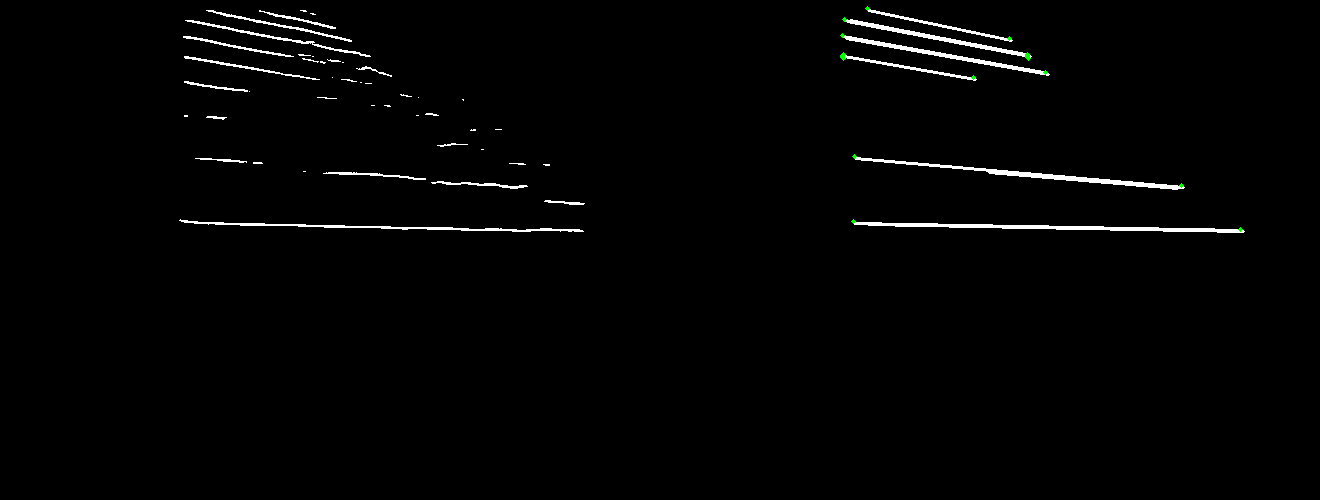

/content/drive/My Drive/Projects/Results_StairPose/mask/1554.png


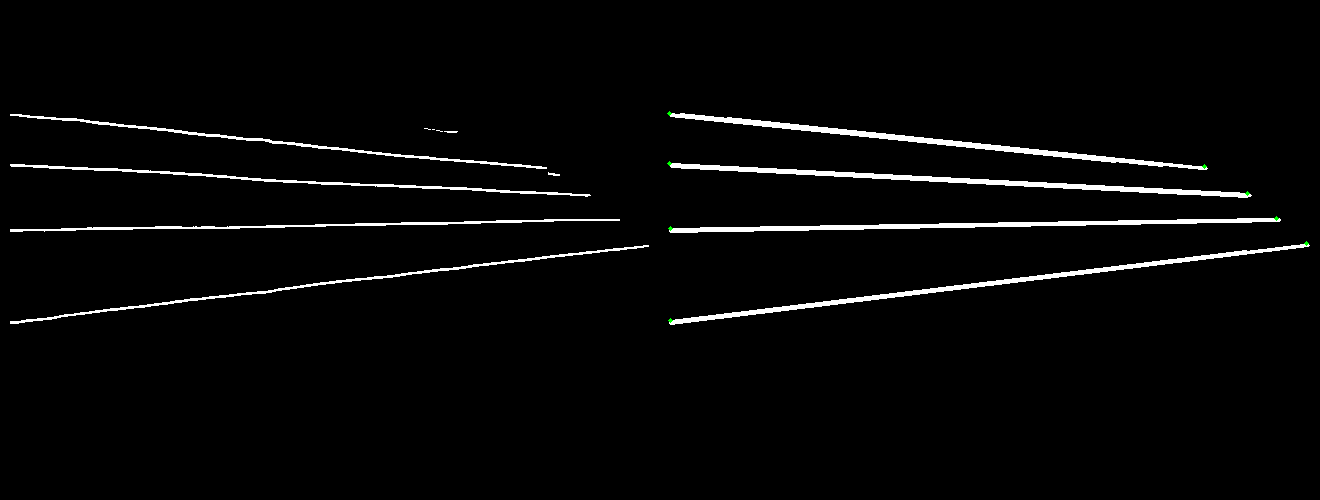

/content/drive/My Drive/Projects/Results_StairPose/mask/1556.png


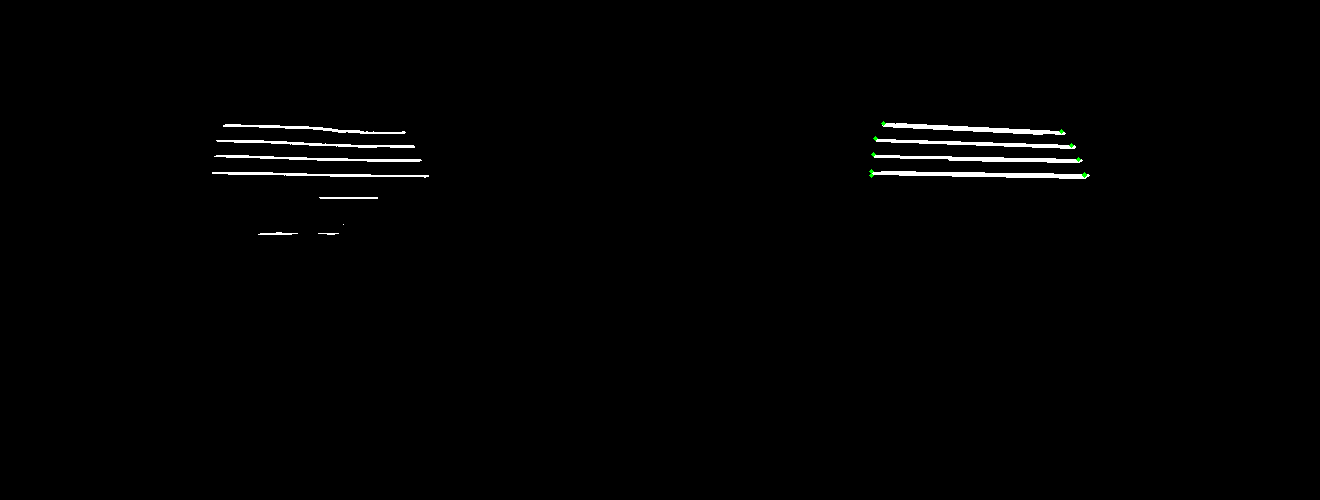

/content/drive/My Drive/Projects/Results_StairPose/mask/1558.png


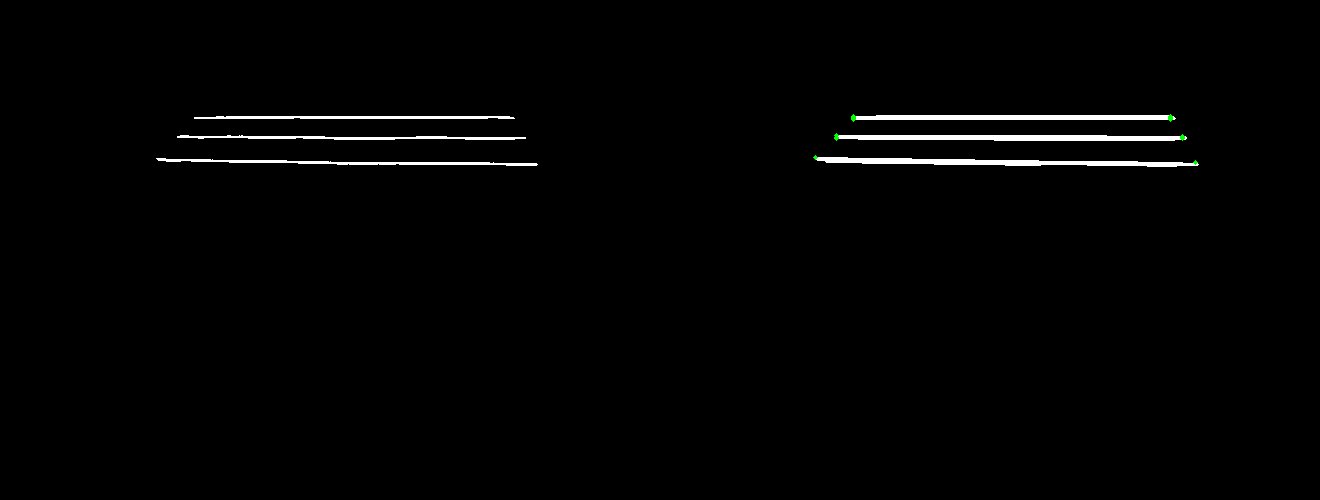

/content/drive/My Drive/Projects/Results_StairPose/mask/1559.png


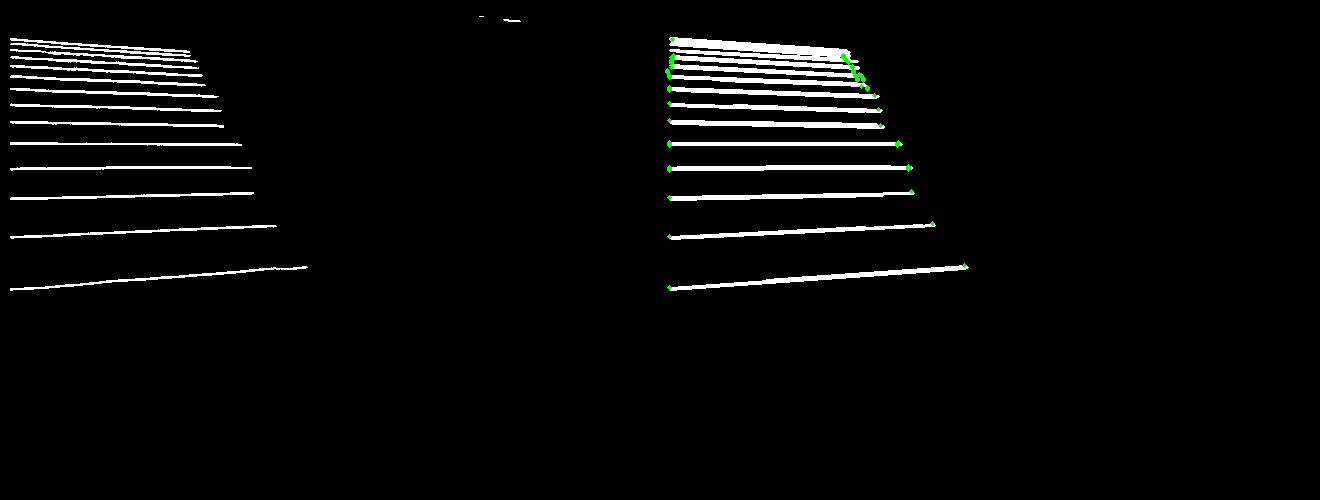

/content/drive/My Drive/Projects/Results_StairPose/mask/1560.png


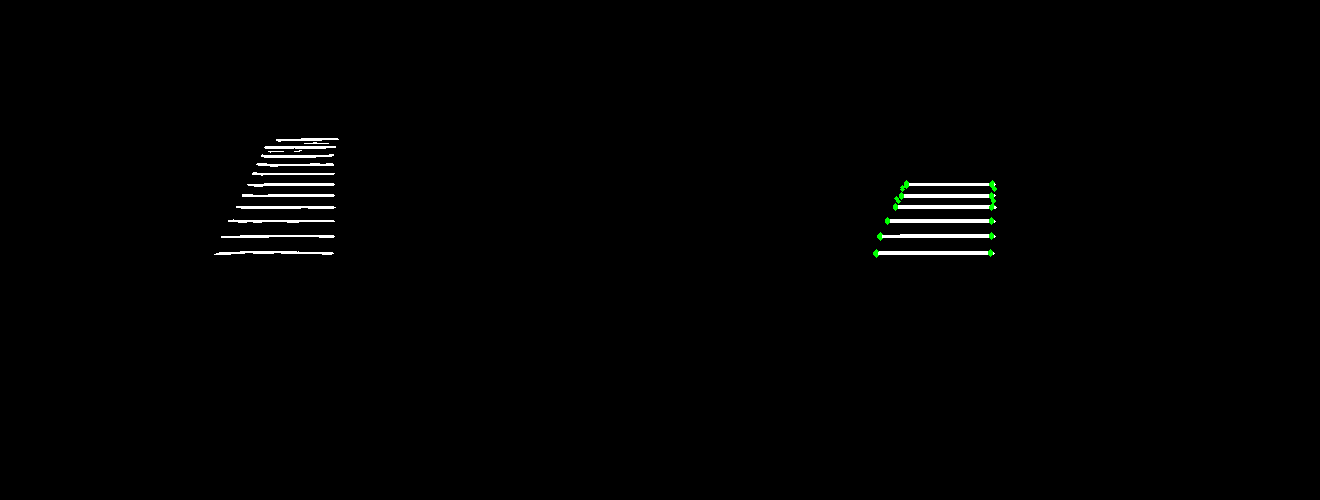

/content/drive/My Drive/Projects/Results_StairPose/mask/1561.png


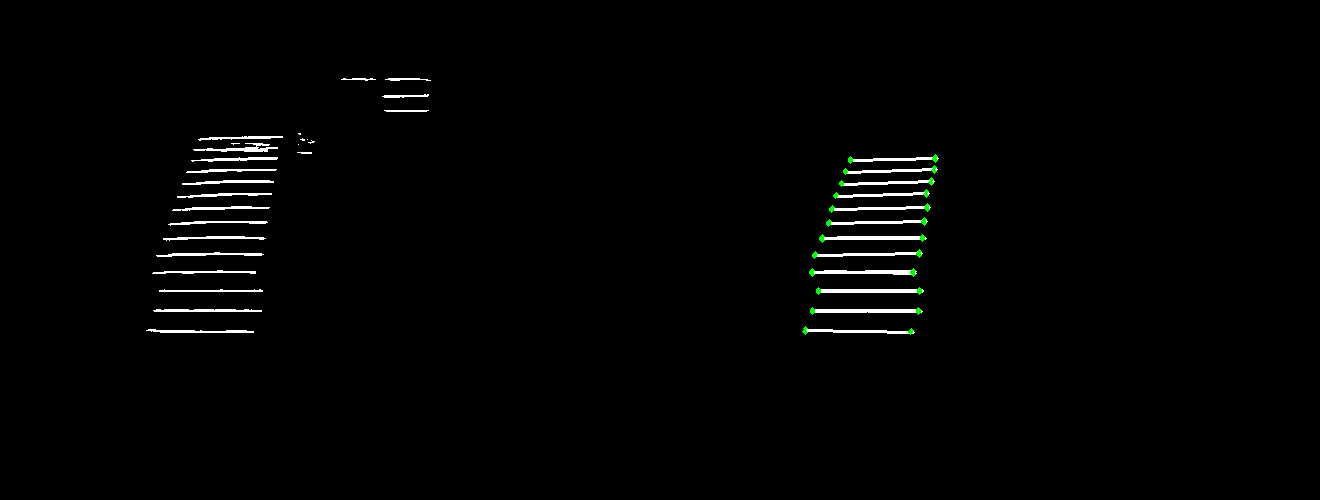

/content/drive/My Drive/Projects/Results_StairPose/mask/1562.png


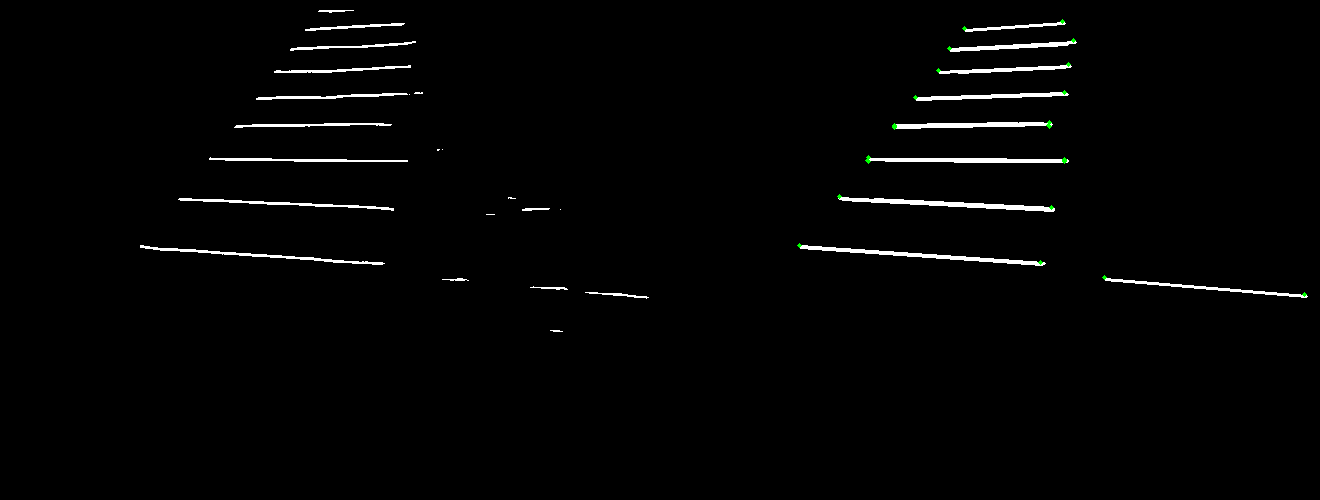

/content/drive/My Drive/Projects/Results_StairPose/mask/1563.png


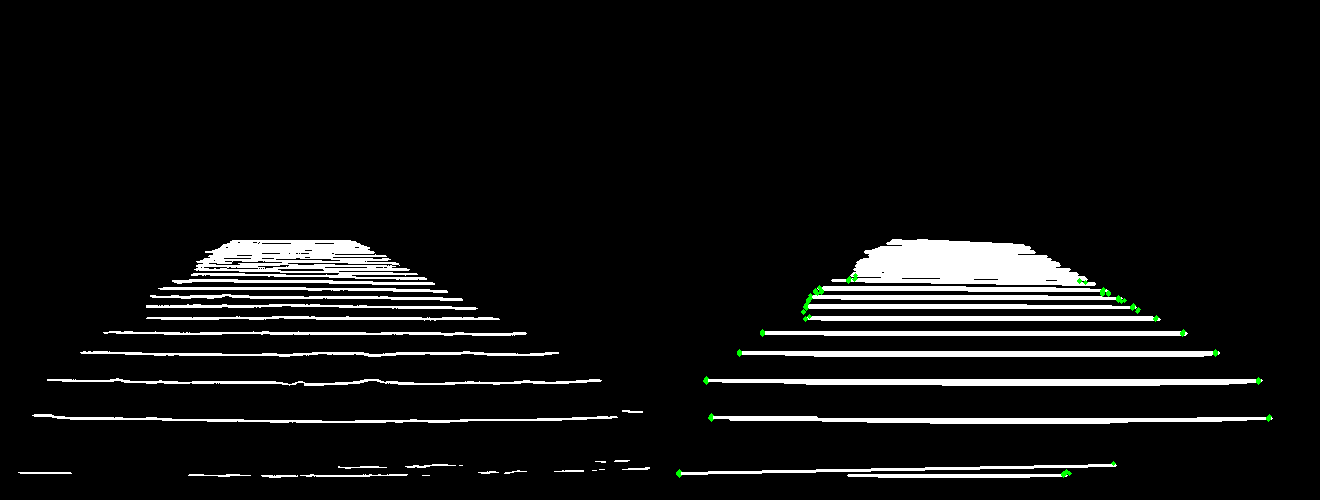

/content/drive/My Drive/Projects/Results_StairPose/mask/1564.png


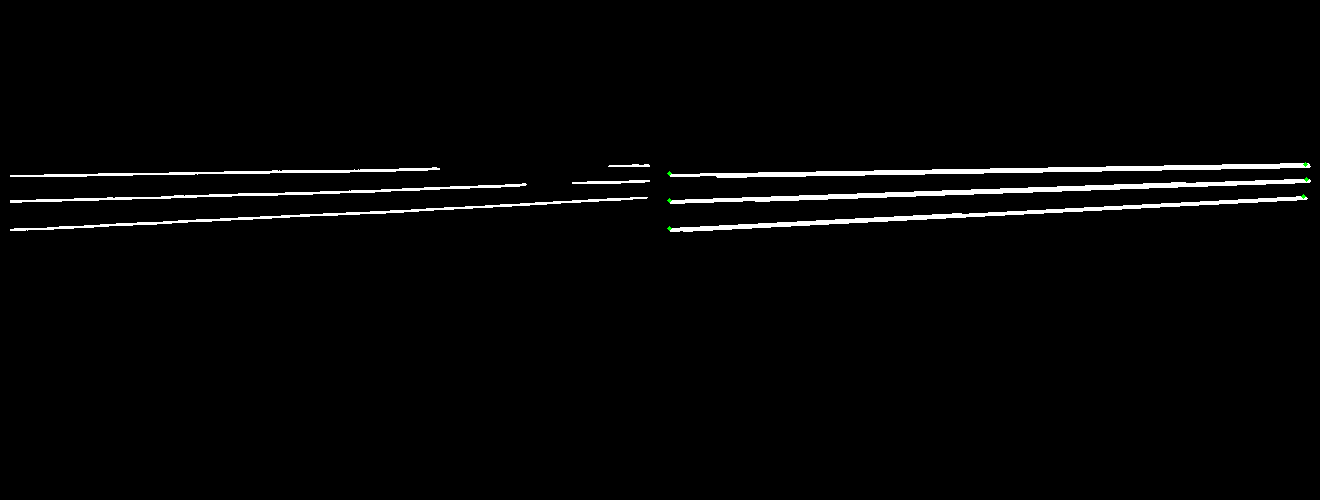

/content/drive/My Drive/Projects/Results_StairPose/mask/1565.png


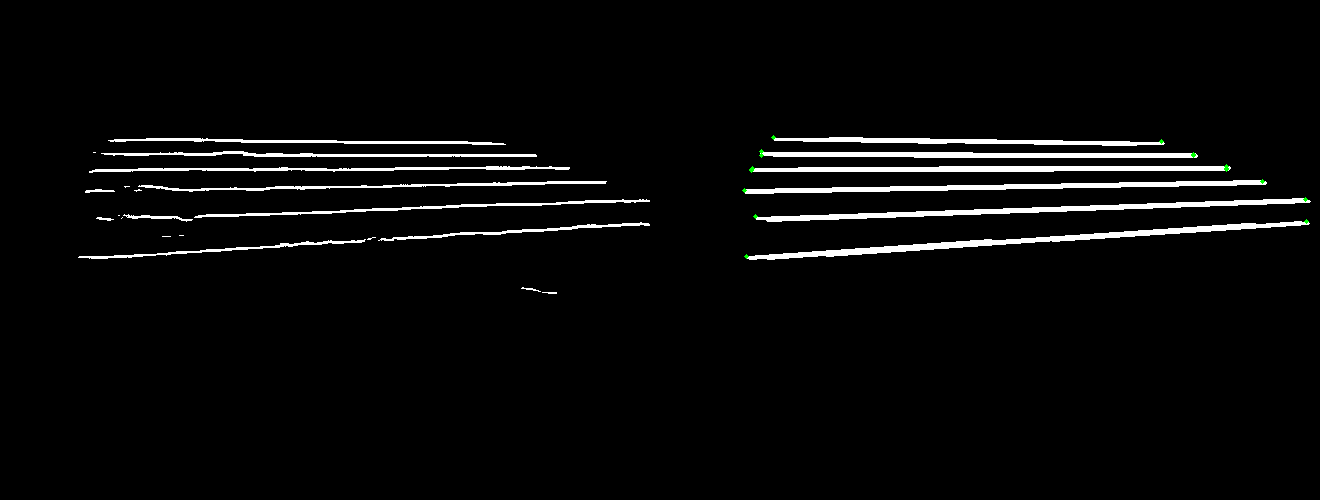

/content/drive/My Drive/Projects/Results_StairPose/mask/1566.png


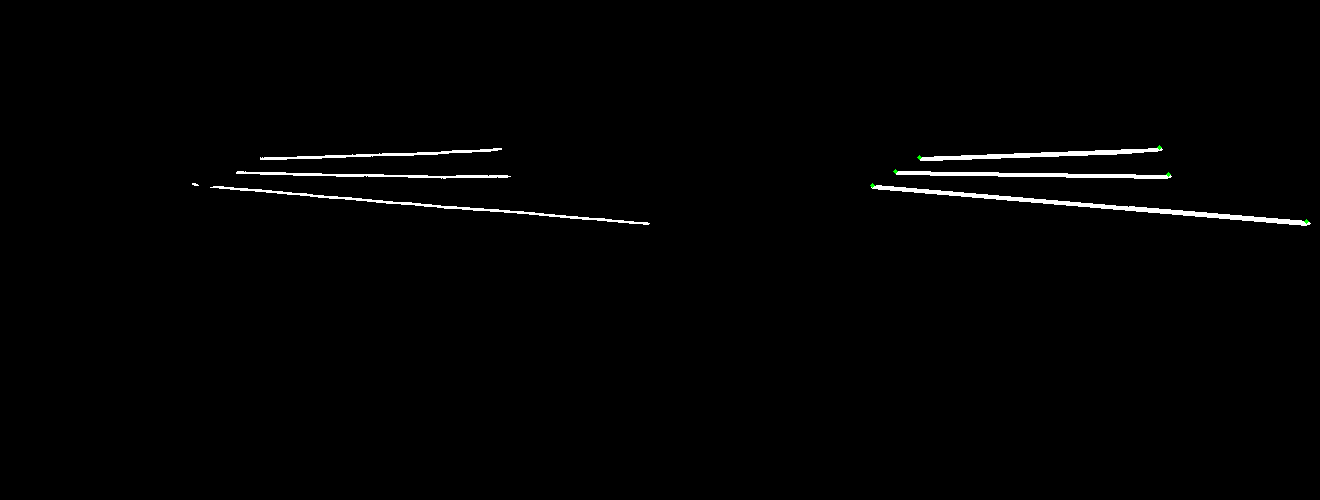

/content/drive/My Drive/Projects/Results_StairPose/mask/1567.png


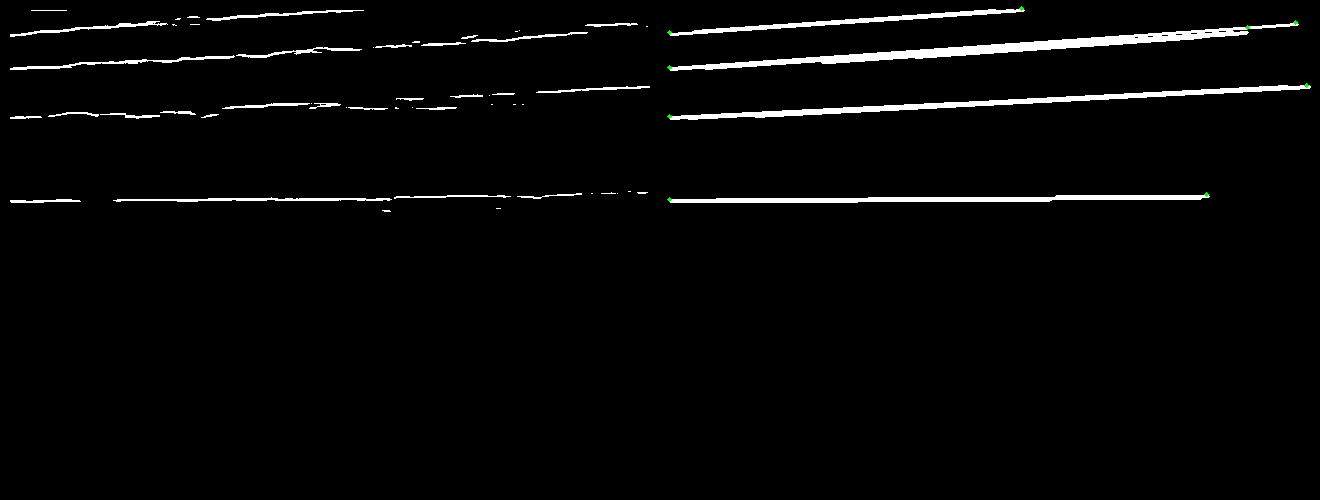

/content/drive/My Drive/Projects/Results_StairPose/mask/1568.png


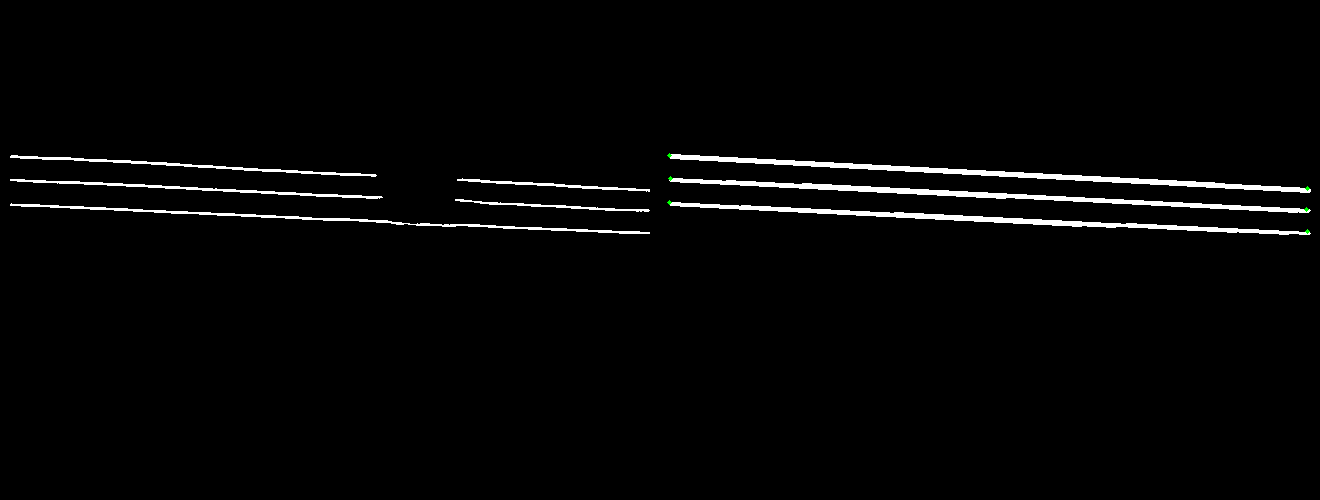

/content/drive/My Drive/Projects/Results_StairPose/mask/1569.png


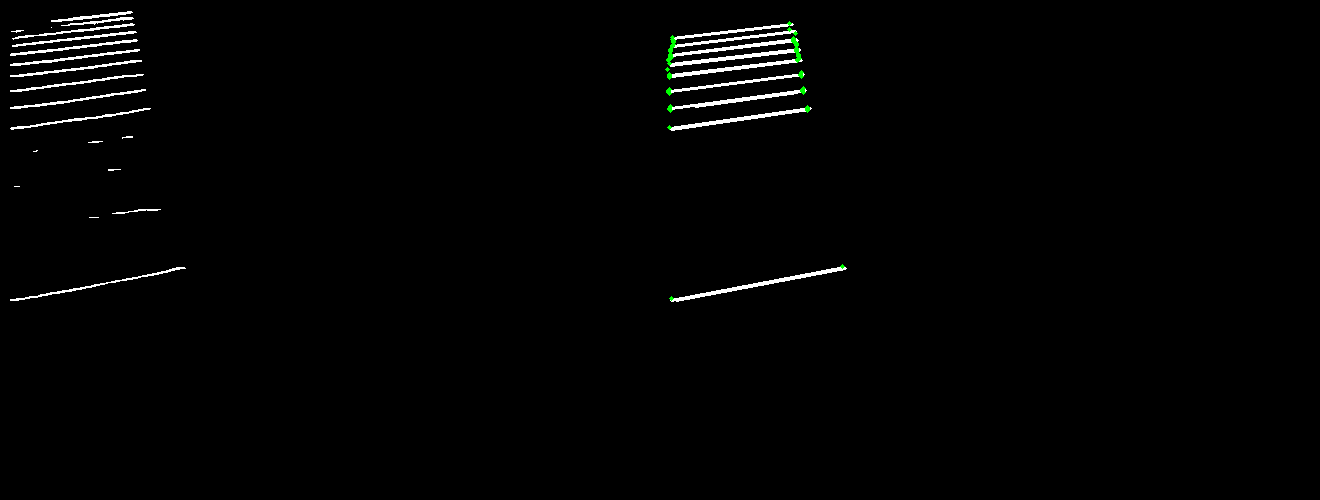

/content/drive/My Drive/Projects/Results_StairPose/mask/1570.png


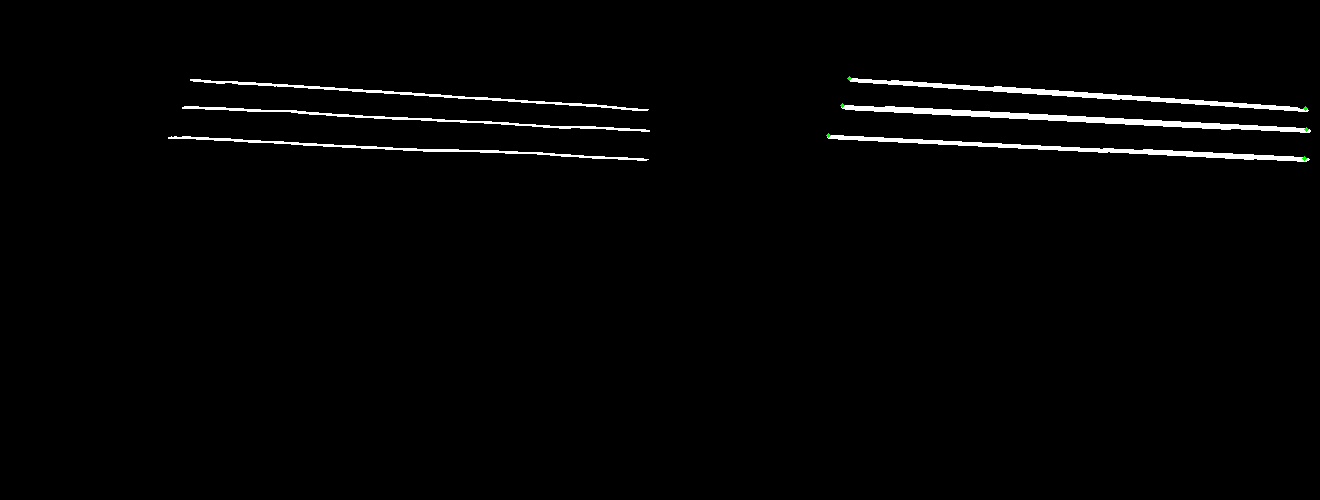

/content/drive/My Drive/Projects/Results_StairPose/mask/1571.png


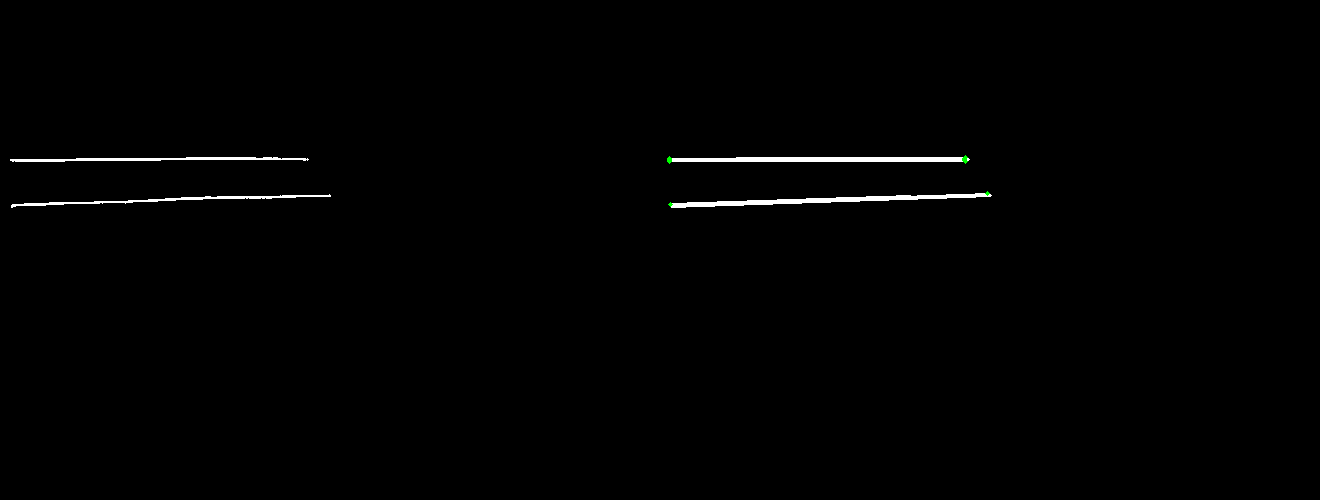

/content/drive/My Drive/Projects/Results_StairPose/mask/1572.png


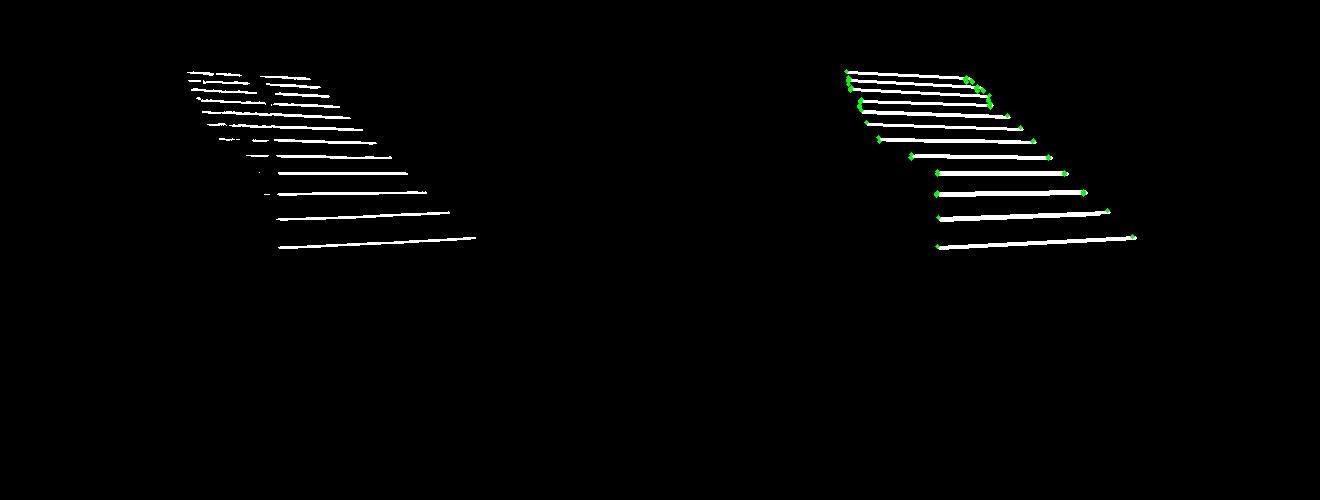

/content/drive/My Drive/Projects/Results_StairPose/mask/1573.png


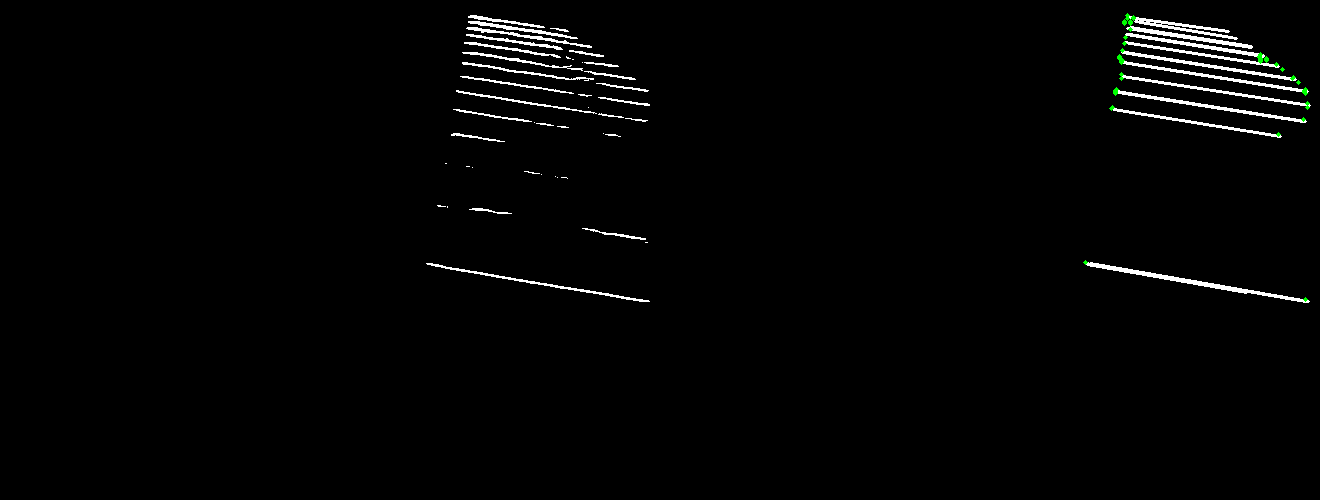

/content/drive/My Drive/Projects/Results_StairPose/mask/1574.png


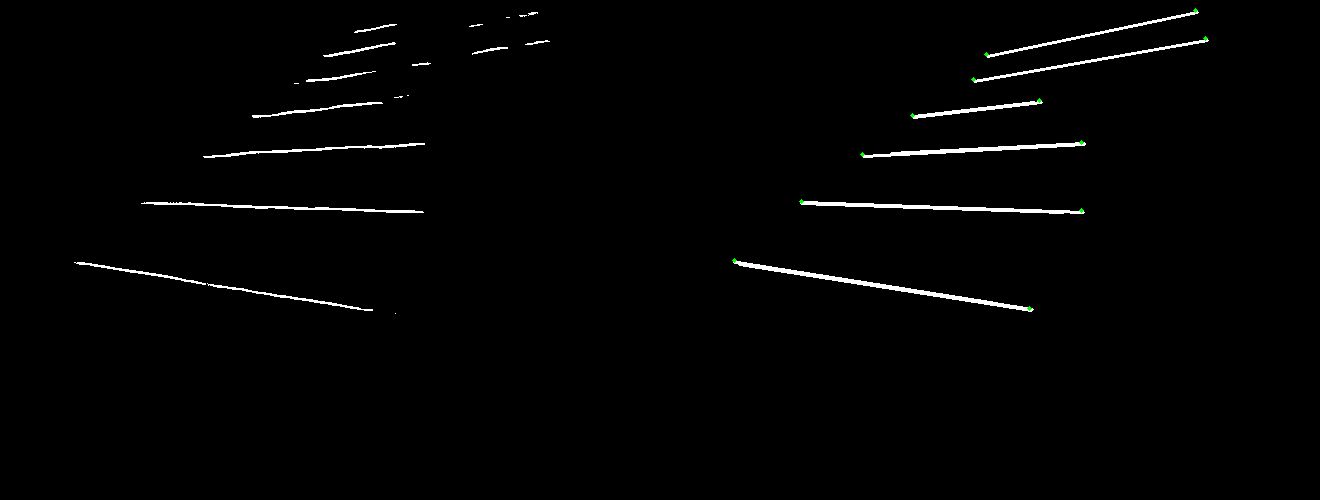

/content/drive/My Drive/Projects/Results_StairPose/mask/1576.png


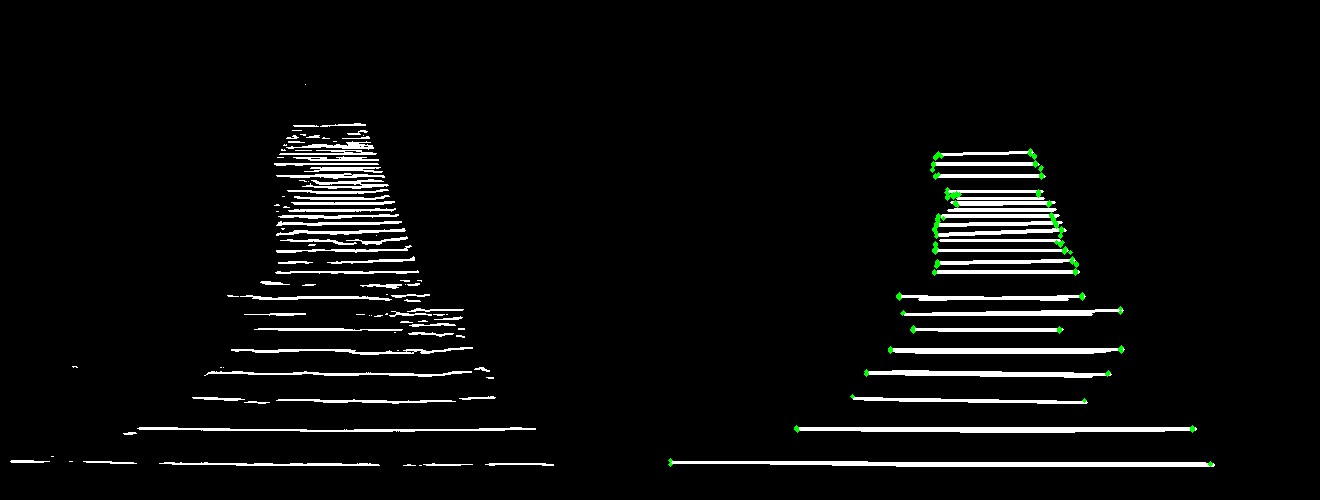

/content/drive/My Drive/Projects/Results_StairPose/mask/1577.png


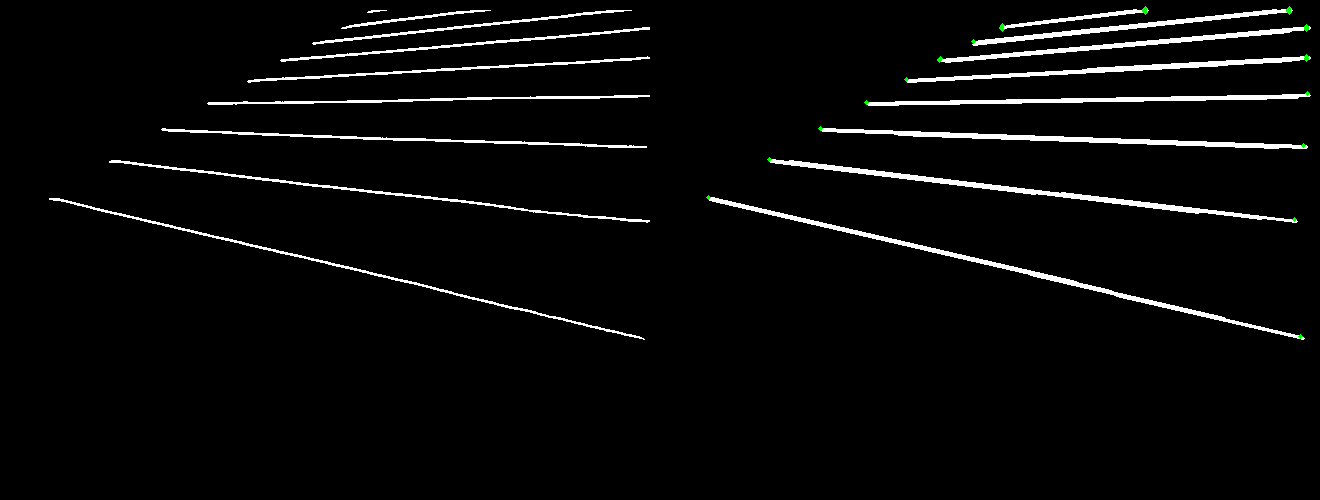

/content/drive/My Drive/Projects/Results_StairPose/mask/1578.png


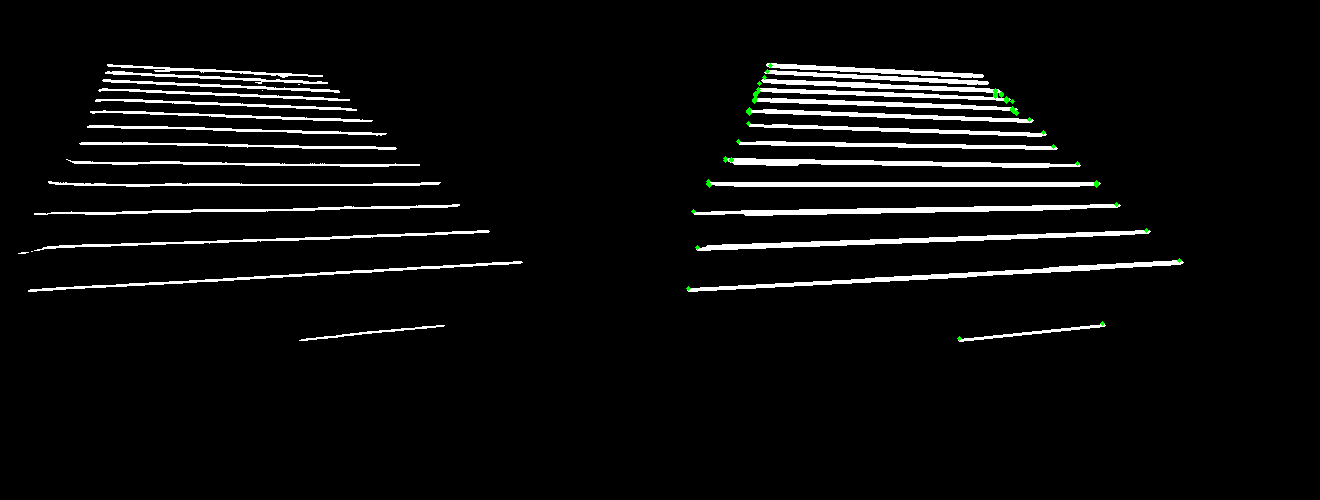

/content/drive/My Drive/Projects/Results_StairPose/mask/1579.png


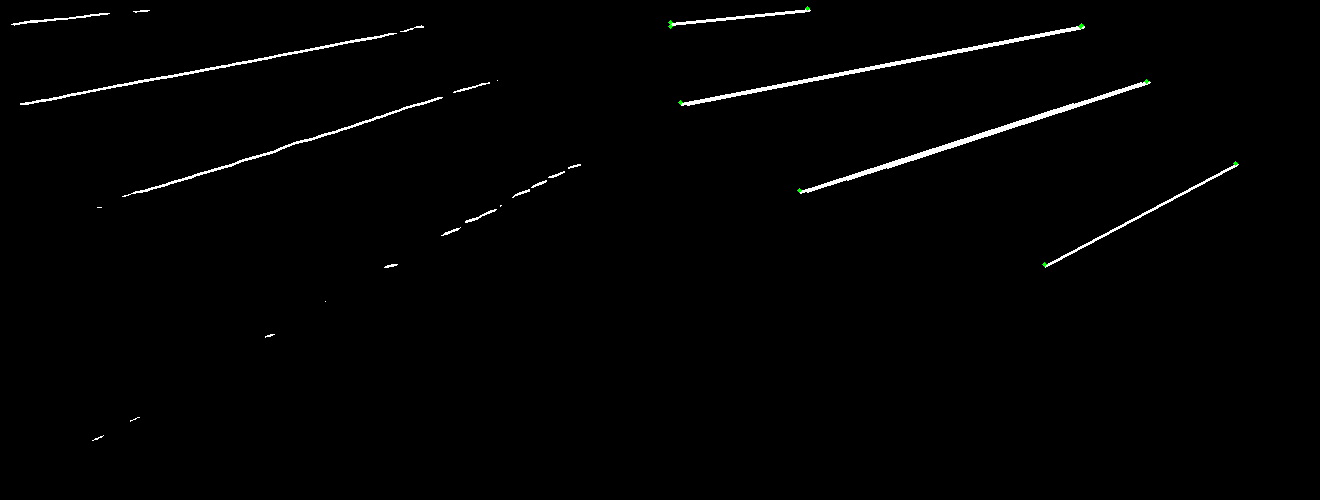

/content/drive/My Drive/Projects/Results_StairPose/mask/1580.png


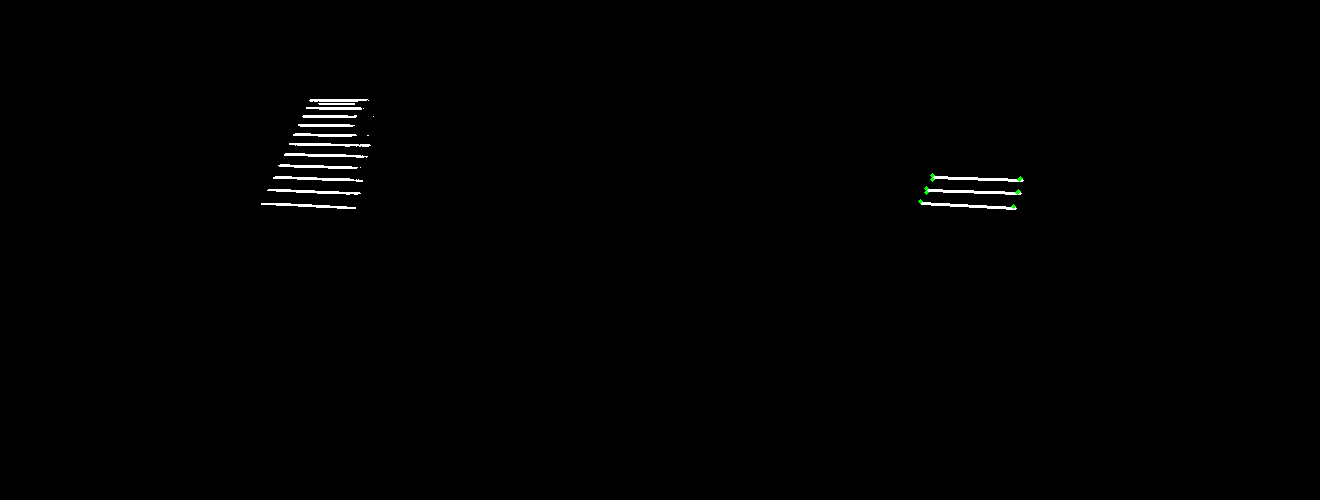

/content/drive/My Drive/Projects/Results_StairPose/mask/1581.png


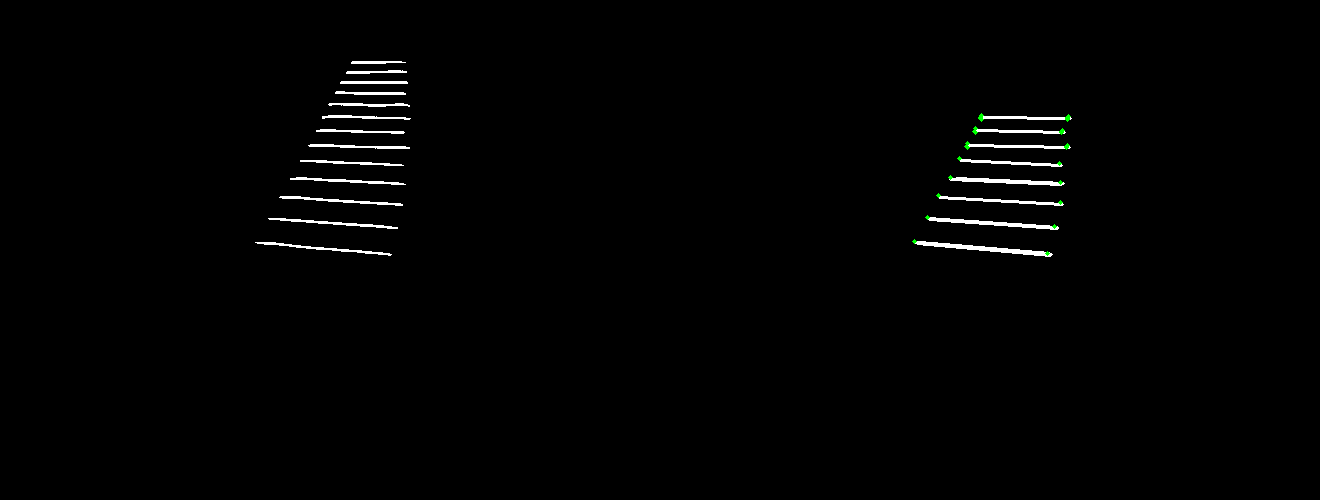

/content/drive/My Drive/Projects/Results_StairPose/mask/1582.png


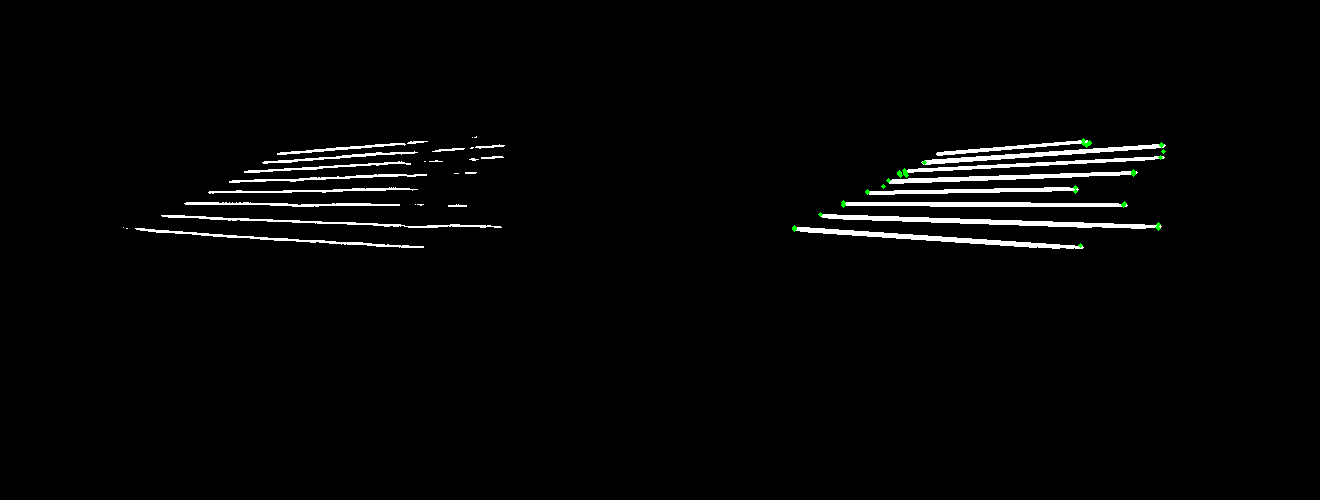

/content/drive/My Drive/Projects/Results_StairPose/mask/1583.png


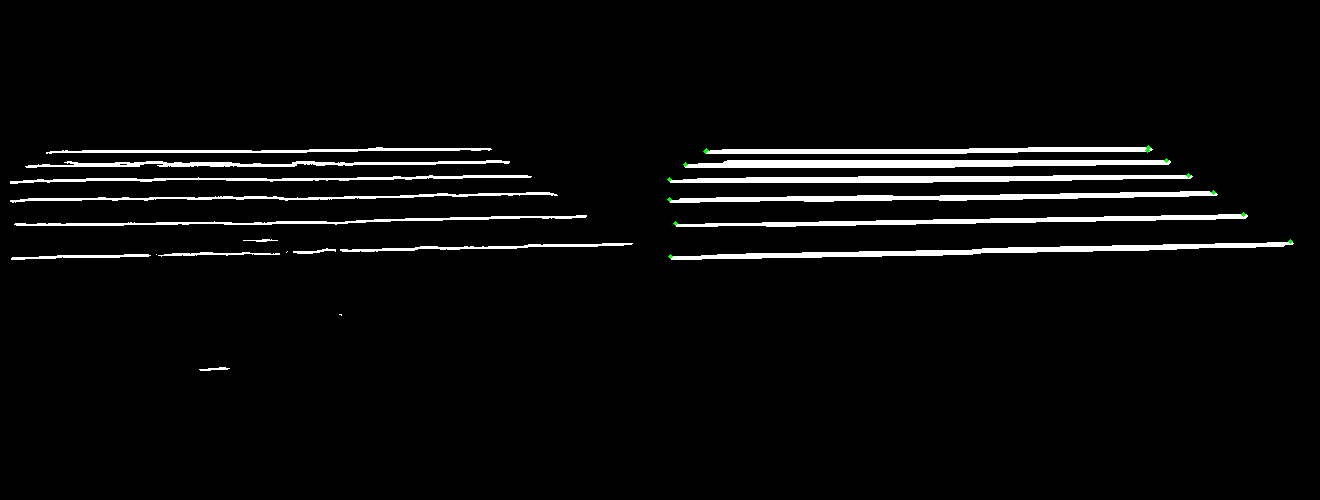

/content/drive/My Drive/Projects/Results_StairPose/mask/1584.png


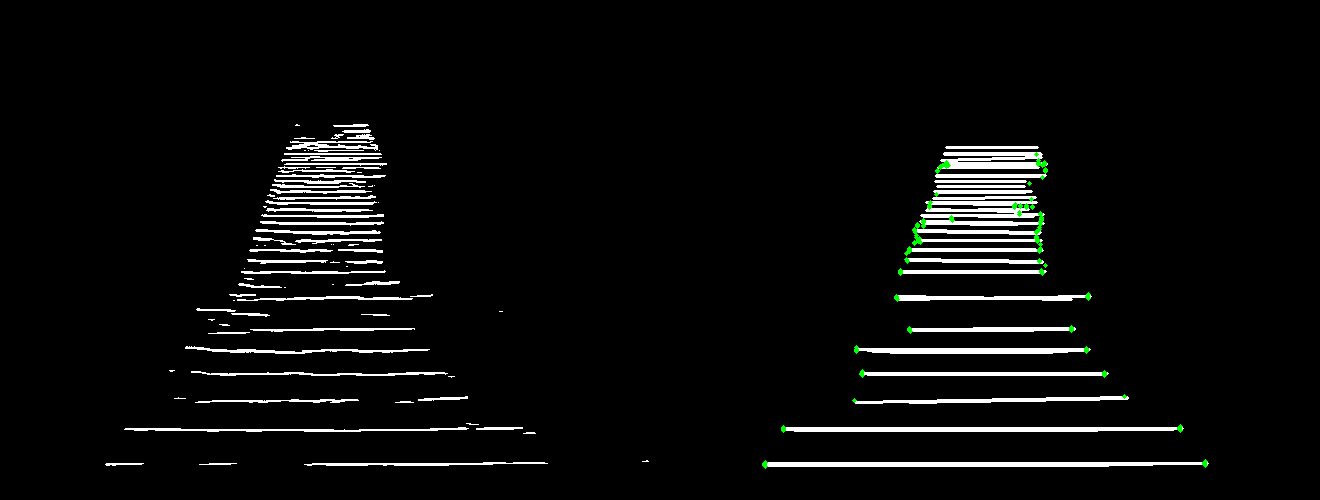

In [ ]:
for i in glob.glob(dataroot+'/*.png'):
# i='/content/drive/My Drive/Projects/Results_StairPose/mask/1584.png'
  print(i)                                       #gives address of each image in mask folder
  img=cv2.imread(i)
  img = cv2.copyMakeBorder( img, 10,10,10,10, cv2.BORDER_CONSTANT)
  # find all your connected components (white blobs in your image)
  nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img[:,:,0], connectivity=8)  #connectivity =4(erodes more) or 8(erodes less)
  #connectedComponentswithStats yields every seperated component with information on each of them, such as size
  #the following part is just taking out the background w[[275, 175, 559, 200]],hich is also considered a component, but most of the time we don't want that.
  sizes = stats[1:, -1]
  nb_components = nb_components - 1
  # minimum size of particles we want to keep (number of pixels)
  #here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever
  min_size = 20
  img2 = np.zeros((img.shape),dtype=np.uint8)
  img3 = np.zeros((img.shape),dtype=np.uint8)
  # img4 = np.zeros((img.shape),dtype=np.uint8)
  #for every component in the image, you keep it only if it's above min_size
  for i in range(0, nb_components):
    if sizes[i] >= min_size:
        img2[output == i + 1] = 255

  lines=hough_transform(img2[:,:,0])
  try:
    if lines is not None:
      for line in lines:
        x1,y1,x2,y2=line[0][0],line[0][1],line[0][2],line[0][3]
        cv2.line(img3,(x1,y1), (x2,y2), (255,255,255),2) 

        #THESE X1,Y1 & X2,Y2 VALUES WILL BE USED USED TO CALCULATE HORIZONTAL POINTS(AS EQN CAN BE FOUND FROM HERE N THEN NC2 POINT INTERSECTION ND USKA MEAN/MEDIAN/MODE)
        # cv2.circle(img4,(x1,y1),3,[0,255,0],-1)
        # cv2.circle(img4,(x2,y2),3,[0,255,0],-1)

    operatedImage = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)  
    dest = cv2.cornerHarris(operatedImage, 5, 31, 0.2) 
    dest = cv2.dilate(dest, None) 
    result=np.where(dest > 0.02 * dest.max())
    list1=[]
    list2=[]
    boolean=True
    for num in range(result[0].shape[0]):
      while boolean:
        list1.append(result[0][num])
        list2.append(result[1][num])
        boolean=False
      if np.abs(result[0][num]-list1[-1])>5 or np.abs(result[1][num]-list2[-1])>5:         #TRY REMOVING ABSOLUTE
        list1.append(result[0][num])
        list2.append(result[1][num])
    for num in range(len(list1)):
      cv2.circle(img3,(list2[num],list1[num]),2,[0,255,0],-1)  #BGR FORMAT 
    img_concate_Hori=np.concatenate((img,img3),axis=1)
    cv2_imshow(img_concate_Hori)
  except:
    print('No stair edge detected')

TO DETECT LEFT ND RIGHT CORNERS

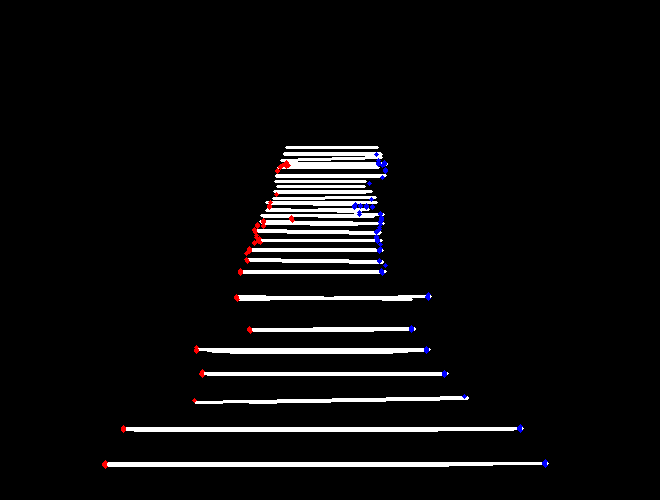

In [ ]:
X=np.array(list(zip(list2,list1)))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
# print(kmeans.labels_)
res=list(zip(*X[kmeans.labels_==0]))
res1=list(zip(*X[kmeans.labels_==1]))
for num in range(len(res[0])):
  cv2.circle(img3,(res[0][num],res[1][num]),2,[255,0,0],-1)
for num in range(len(res1[0])):
  cv2.circle(img3,(res1[0][num],res1[1][num]),2,[0,0,255],-1)

cv2_imshow(img3)
# print(kmeans.cluster_centers_)
# plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')        #for plotting clusttered data
# plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')    #for plotting center of cluster

FINDING VERTICAL VANISHING POINTS

The linear model is: Y = -356.04 + 1.5389X
The linear model is: Y = 646.36 + -1.5747X
vertical vanishing point is (321.9403623227673, 139.3967281851888)


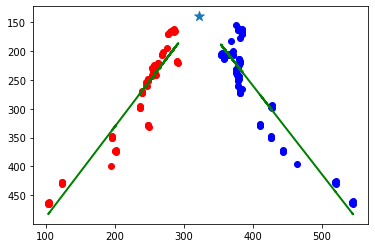

In [ ]:
plt.gca().invert_yaxis()  #to shift origin to upperleft corner
x=np.array(res[0]).reshape(-1,1)
y=np.array(res[1]).reshape(-1,1)
x1=np.array(res1[0]).reshape(-1,1)
y1=np.array(res1[1]).reshape(-1,1)
reg = LinearRegression()
reg.fit(x,y)
plt.scatter(
    x,
    y,
    c='blue'
)
reg1 = LinearRegression()
reg1.fit(x1,y1)
plt.scatter(
    x1,
    y1,
    c='red'
)
c=np.squeeze(reg1.coef_)
d=np.squeeze(reg1.intercept_)
b=np.squeeze(reg.intercept_)
a=np.squeeze(reg.coef_)

print("The linear model is: Y = {:.5} + {:.5}X".format(b,a))  #b a
print("The linear model is: Y = {:.5} + {:.5}X".format(d,c))  #d c
predictions=np.squeeze(reg.intercept_)+np.squeeze(reg.coef_) *x
plt.plot(
    x,
    predictions,
    c='green',
    linewidth=2
)
predictions1=np.squeeze(reg1.intercept_)+np.squeeze(reg1.coef_) *x1
plt.plot(
    x1,
    predictions1,
    c='green',
    linewidth=2
)
X_intersection=(d-b)/(a-c)
Y_intersection=a*X_intersection+b
plt.scatter(X_intersection,Y_intersection,marker='*',s=100)
print('vertical vanishing point is {}'.format((X_intersection,Y_intersection)))

FINDING HORIZONTAL VANISHING POINTS

In [ ]:
# # Function which returns subset or r length from n (ncr combination)
# from itertools import combinations 

# def rSubset(arr, r): 

# 	# return list of all subsets of length r 
# 	# to deal with duplicate subsets use 
# 	# set(list(combinations(arr, r))) 
# 	return list(combinations(arr, r)) 
 
#  #The corner vector 

# arr = np.array([[[5, 5], [20, 4]],
#               [[14, 23], [32, 22]],
#               [[38,23], [23, 34]]]) 
# r = 2
# t = rSubset(arr, r)

# #defining the custom line and intersection functions
# from __future__ import division 

# def line(p1, p2):
#     A = (p1[1] - p2[1])
#     B = (p2[0] - p1[0])
#     C = (p1[0]*p2[1] - p2[0]*p1[1])
#     return A, B, -C

# def intersection(L1, L2):
#     D  = L1[0] * L2[1] - L1[1] * L2[0]
#     Dx = L1[2] * L2[1] - L1[1] * L2[2]
#     Dy = L1[0] * L2[2] - L1[2] * L2[0]
#     if D != 0:
#         x = Dx / D
#         y = Dy / D
#         return x,y
#     else:
#         return False

# xmean = []#all the x values of intersections of various combinations
# ymean = []#all the y values of intersections of various combinations
# for i in range(0, len(t)):

# line1 = line(t[i][0][0], t[i][0][1])
# line2 = line(t[i][1][0], t[i][1][1])

# int_pt = intersection(line1, line2)

# point_of_intersection = int_pt
# xmean.append(int_pt[0])
# ymean.append(int_pt[1])
# print(point_of_intersection)

# np.mean(xmean)
# np.mean(ymean)


STAIR POSE ESTIMATION

In [ ]:
# cx,cy = imWidth//2, imHeight//2.
# def getPose(vp1, vp2, origin,He):
#     origin = x1,y1
#     ux,vx = vp1
#     uy,vy = vp2
#     f = (((ux-cx)(uy-cx) + (vx-cy)(vy-cy))-1)*0.5
#     K = np.array([[f, 0., cx], [0., f, cy], [0., 0., 1]])
#     print(K)
    
#     Kinv = np.linalg.inv(K)
#     xvec = Kinv @ np.array([ux,vx,1.]) 
#     yvec = Kinv @ np.array([uy,vy,1.]) 

#     rx = np.array([xvec / np.linalg.norm(xvec)])
#     ry = np.array([yvec / np.linalg.norm(yvec)])
#     zvec = np.cross(rx, ry)
#     rz = np.array(zvec / np.linalg.norm(zvec))
#     R = np.concatenate([rx,ry], axis=0)
#     R = np.concatenate([R, rz], axis = 0).transpose()
#     u,w,vt = np.linalg.svd(R)
#     w = np.eye(3)
#     R = u@w@vt
#     rvec, _ = cv2.Rodrigues(R)
#     print(rvec)
    
#     P = np.eye(3,4)
#     u_, v_, w_ = Kinv@np.array([x1,y1,1.])
#     tx = tz * u_
#     ty = tz * v_
    
#     tz = -He / (R[1][0]*u_ + R[1][1]*v_ + R[1][2]*w_)
#     T = np.array([tx, ty, tz])
#     print(T)
    
#     P[:,:3] = R
#     P[:,3] = T
    
#     return P